# **CMPE-257**

**Final Exam**
```
Jack Kalavadia
Pramatha Nadig
Rishikesh Andhare
Rutvik Moradiya

```


## Final Exam


1. Use the Model you fine tuned for your poet. Generate 5 poems from it.

2. write a function or class that assesses the probability that the  poem will be a pushcart winner, given a random poem, and a poem you generated use the ratios to define a baseline , compared to the average (gold std) of the pushcart winners, bucketize the groups

3. plot ratios of the nlp stats and them try to the figure what is the golden cluster (how can use words that are closer to the centroid of the golden cluster, higher coherence relative to the golden cluster's centroid)

4. write function that takes a .txt file and generates the POS, KG using networkx and transitive closure

5. how do you combine KG and vector dbs?

a. choose 3 articles, one that has high degree of overlap, one that has none, one that is in the middle
b. 3 articles --> kg --> <???> embedding --> store in the vector db
c. then retrieve the articles based on the poem as a query
d. each team member investigate try experiments with at least one path / technique for the unknown ???
6. put the results back in your research paper. Submit the final draft research paper along with this exam.
7. [Extra credit] Video. Record a video describing your research paper and contributions by each team member.

Importing libraries

In [ ]:
!pip3 install nltk
!pip3 install sentence-transformers
!pip3 install contractions
!pip3 install pandas
!pip install bertopic
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=9fb64eae9a771a61548ed5361e615a4ba03faef8c1712dd4b16f2003eeccb105
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━

In [ ]:
poet1 = "John Keats"
poet2 = "John Keats"
store_loc = "/content/drive/MyDrive/poets/"


In [ ]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os

import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim as gensimvis
from gensim.utils import simple_preprocess

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


Scarpping 30 Poems for the poet John Keats and saving it to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
poet1 = "John Keats"
poet2 = "John Keats"
store_loc = "/content/drive/MyDrive/poets/"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

def scrapePoemFromURL(poem_url_list):
    poems_results=[]
    for url in poem_url_list:
        header = {'User-Agent':'Mozilla/5.0'}
        requests = urllib.request.Request(url,headers=header)
        requestread = urllib.request.urlopen(requests).read()
        soup = bs.BeautifulSoup(requestread,'html.parser')
        poem_for_human = soup.find_all('div', class_="poem_body")[0].text.replace("© by owner. provided at no charge for educational purposes", "")
        poem_for_machine = (clean_txt(poem_for_human))
        poem_title = soup.find_all('h1')[0].text
        poems_results.append([poem_title, poem_for_machine, poem_for_human])
    return poems_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def get_poem_url_json(poet):
    site = "https://allpoetry.com"
    search = "https://allpoetry.com/items/read_by/"
    page = 1
    URL_list = list()
    print("site")
    while len(URL_list) < 30:
        url = search + poet + "?page=" + str(page)

        response = requests.get(url)
        soup = bs.BeautifulSoup(response.text, 'lxml')
        poem_list = soup.find_all('a', href=True, class_='nocolor fn')
        for i in range(len(poem_list)):
            #print(poem_list[i]['href'])
            URL_list.append(site + poem_list[i]['href'])
            if len(URL_list) == 30:
                break
        page += 1
    return {"poet":poet, "URL":URL_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pd_title_list = ["Title", "Poem", "Poem_for_Human"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def getPoem(file_name, URLs):
    df = pd.DataFrame()
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
    else:
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
        df = pd.DataFrame(scrapePoemFromURL(URLs), columns=pd_title_list)
        df.to_csv(file_name)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
file_name = store_loc + poet1.replace(" ", "_") + ".csv"
WS_df = getPoem(file_name, get_poem_url_json(poet1)['URL'])

file_name = store_loc + poet2.replace(" ", "_") + ".csv"
JWG_df = getPoem(file_name, get_poem_url_json(poet2)['URL'])

site


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site


In [ ]:
WS_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                                              Title  \
0            0   Sonnet: When I Have Fears That I May Cease To Be   
1            1                                      Ode To Autumn   
2            2                               Ode To A Nightingale   
3            3                                A Song About Myself   
4            4                               Ode On A Grecian Urn   
5            5                                      Meg Merrilies   
6            6          Sonnet XV. On The Grasshopper And Cricket   
7            7                                     Lamia. Part I    
8            8                           La Belle Dame Sans Merci   
9            9  Sonnet. Written On A Blank Page In Shakespeare...   
10          10                                   Endymion: Book I   
11          11   Sonnet XI. On First Looking Into Chapman's Homer   
12          12                                    Sonnet To Sleep   
13          13  Sonnet. If By Dull Rhymes Our English Must Be ...   
14          14                            Sonnet VII. To Solitude   
15          15  Two Sonnets. To Haydon, With A Sonnet Written ...   
16          16                                   You Say You Love   
17          17                     Give Me Women, Wine, And Snuff   
18          18                                      Ode To Psyche   
19          19                                 Ode  On Melancholy   
20          20                                    Sonnet To Homer   
21          21       La Belle Dame Sans Merci (Original version )   
22          22               Stanzas. In A Drear-Nighted December   
23          23                                   This Living Hand   
24          24                                             Staffa   
25          25                          Sonnet. The Human Seasons   
26          26                               Hither, Hither, Love   
27          27                                  Hyperion. Book I    
28          28                        Fill For Me A Brimming Bowl   
29          29  Isabella; Or, The Pot Of Basil: A Story From B...   

                                                 Poem  \
0   when have fears that may cease to be before my...   
1   season of mists and mellow fruitfulness close ...   
2   my heart aches and drowsy numbness pains my se...   
3   there was naughty boy naughty boy was he he wo...   
4   thou still unravish bride of quietness thou fo...   
5   old meg she was gipsy and liv upon the moors h...   
6   the poetry of earth is never dead when all the...   
7   upon time before the faery broods drove nymph ...   
8   ah what can ail thee wretched wight alone and ...   
9   bright star would were stedfast as thou art no...   
10  thing of beauty is joy for ever its loveliness...   
11  much have travell in the realms of gold and ma...   
12  soft embalmer of the still midnight shutting w...   
13  if by dull rhymes our english must be chain an...   
14  solitude if must with thee dwell let it not be...   
15  haydon forgive me that cannot speak definitive...   
16  you say you love but with voice chaster than n...   
17  give me women wine and snuff until cry out hol...   
18  goddess hear these tuneless numbers wrung by s...   
19  no no go not to lethe neither twist wolf bane ...   
20  standing aloof in giant ignorance of thee hear...   
21  oh what can ail thee knight at arms alone and ...   
22  in drear nighted december too happy happy tree...   
23  this living hand now warm and capable of earne...   
24  not aladdin magian ever such work began not th...   
25  four seasons fill the measure of the year ther...   
26  hither hither love it is shady mead hither hit...   
27  deep in the shady sadness of vale far sunken f...   
28  fill for me brimming bowl and in it let me dro...   
29  fair isabel poor simple isabel lorenzo young p...   

                                       Poem_for_Human  
0   When I have fears that I may cease t

fetching all poems from John_Keats.csv

In [ ]:

import pandas as pd

# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/poets/John_Keats.csv'
df = pd.read_csv(file_path)

# Read the CSV file into a pandas DataFrame
poem_column = df['Poem']

# Display the values in the 'Poem' column
print(poem_column)


0     when have fears that may cease to be before my...
1     season of mists and mellow fruitfulness close ...
2     my heart aches and drowsy numbness pains my se...
3     there was naughty boy naughty boy was he he wo...
4     thou still unravish bride of quietness thou fo...
5     old meg she was gipsy and liv upon the moors h...
6     the poetry of earth is never dead when all the...
7     upon time before the faery broods drove nymph ...
8     ah what can ail thee wretched wight alone and ...
9     bright star would were stedfast as thou art no...
10    thing of beauty is joy for ever its loveliness...
11    much have travell in the realms of gold and ma...
12    soft embalmer of the still midnight shutting w...
13    if by dull rhymes our english must be chain an...
14    solitude if must with thee dwell let it not be...
15    haydon forgive me that cannot speak definitive...
16    you say you love but with voice chaster than n...
17    give me women wine and snuff until cry out

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Scrapped and fetched 30 Articles related to poet instead of 3 Articles for better model training

In [ ]:
# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/poets/John_Keats_Articles.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it was loaded correctly
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                                            Article  \
0           0  What major global events occurred during John ...   
1           1  How might the French Revolution have impacted ...   
2           2  How did the Napoleonic Wars contribute to the ...   
3           3   In what ways did the Industrial Revolution, c...   
4           4   How did the geopolitical landscape of England...   

                                      GeneratedValue  
0  John Keats inhabited a world marked by transfo...  
1  The French Revolution, a tumultuous epoch of r...  
2  The Napoleonic Wars, casting a pervasive shado...  
3  The sweeping changes brought forth by the Indu...  
4  The geopolitical landscape of early 19th-centu...

In [ ]:
values =df['GeneratedValue']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30 Articles related to John Keats

In [ ]:
print(values)

0     John Keats inhabited a world marked by transfo...
1     The French Revolution, a tumultuous epoch of r...
2     The Napoleonic Wars, casting a pervasive shado...
3     The sweeping changes brought forth by the Indu...
4     The geopolitical landscape of early 19th-centu...
5     John Keats lived through a period of notable h...
6     John Keats's poetic style and thematic choices...
7     John Keats's poetic endeavors were intricately...
8     John Keats's personal experiences, including h...
9     John Keats's poetic creations bear the unmista...
10    John Keats's relationships, notably his intens...
11    John Keats emerged as a transformative figure ...
12    John Keats's views on nature, deeply rooted in...
13    John Keats's critical reception during his lif...
14    John Keats's untimely death at the tender age ...
15    John Keats's early life, marked by the loss of...
16    John Keats's educational journey, particularly...
17    John Keats's enchantment with classical li

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Installing packages for Model

In [ ]:
# install required packages
!pip install -q transformers peft accelerate bitsandbytes safetensors sentencepiece streamlit weaviate-client langchain sentence-transformers tiktoken youtube-transcript-api

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.3/120.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 103.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 110.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 122.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Setting  and using up Weaviate for vector database

In [ ]:
# fixing unicode error in google colab
import locale

locale.getpreferredencoding = lambda: "UTF-8"

# import dependencies
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    pipeline,
)
from langchain.text_splitter import TokenTextSplitter
from langchain.llms import HuggingFacePipeline
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import HuggingFacePipeline
from langchain.chains import RetrievalQA
from langchain.vectorstores import Weaviate
from langchain.schema import Document

import weaviate

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/langchain_core/prompts/prompt.py:200: DeprecationWarning: `input_variables' is deprecated and ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_core/prompts/prompt.py:200: DeprecationWarning: `input_variables' is deprecated and ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_core/prompts/prompt.py:200: DeprecationWarning: `input_variables' is deprecated and ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain_core/prompts/prompt.py:200: DeprecationWarning: `input_variables' is deprecated and ignored.
  warnings.warn(


Weatviate Cluster setup

In [ ]:
WEAVIATE_URL = "https://ml-assignment-3k3fcwgq.weaviate.network"
WEAVIATE_API_KEY = "GKyECq3YO7AsawpRv7pb206ryybMSrkJclF8"

client = weaviate.Client(
    url=WEAVIATE_URL, auth_client_secret=weaviate.AuthApiKey(WEAVIATE_API_KEY)
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Local embedding and LLM models
I am most familiar with the LangChain LLM framework, so we will be using it to ingest documents as well as retrieve them. We will be using sentence_transformers/all-mpnet-base-v2 embedding model and zephyr-7b-alpha llm. Both of these models are open source and available on HuggingFace. The implementation code for these two models in LangChain was kindly borrowed from the following repository:

https://github.com/aigeek0x0/zephyr-7b-alpha-langchain-chatbot

We will begin by defining the embedding model, which can be easily retrieved from HuggingFace using the following code:

Embeddings for articles

In [ ]:
# specify embedding model (using huggingface sentence transformer)
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
    model_name=embedding_model_name, model_kwargs=model_kwargs
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Storing Articles of John keats  into Weaviate


In [ ]:
poems = poem_column.tolist()
articles = values.tolist()
len(poems), len(articles)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(30, 30)

In [ ]:
# Creating a list of dictionaries with 'content' key
all_docs = [Document(page_content=text, metadata = {"source": "poems"}) for text in poems]
all_docs = all_docs + [Document(page_content=text, metadata = {"source": "articles"}) for text in articles]
print(len(all_docs))

60


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
text_splitter = TokenTextSplitter(chunk_size=128, chunk_overlap=0)
split_docs = text_splitter.split_documents(all_docs)

# Assuming you have 'embeddings' and 'client' defined somewhere in your code
vector_db = Weaviate.from_documents(
    split_docs, embeddings, client=client, by_text=False
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import AutoModelForCausalLM, BitsAndBytesConfig

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enhancement by asking question during the specific period

## 1.Finetuned model loading and Creating 5 poems from the fine tune model

In [ ]:
!huggingface-cli login

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


Loading the fine Tune Model from drive

In [ ]:
# specify model huggingface mode name
model_name = "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175"

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


pytorch_model.bin.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/5.06G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/967 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

In [ ]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175/")

In [ ]:
eval_prompt = "Best poem by john keats describing feelings"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    generated_tokens = ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)

# Convert the generated tokens to text (excluding the eval_prompt)
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Remove the eval_prompt from the generated text
if eval_prompt in generated_text:
    generated_text = generated_text.replace(eval_prompt, '')

# Print or use the generated poem (excluding the eval_prompt)
print(generated_text)

# Store the poem in poem5 variable (excluding the eval_prompt)
poem1 = generated_text


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love


In [ ]:
eval_prompt = "poem on nature by john keats"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    generated_tokens = ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)

# Convert the generated tokens to text (excluding the eval_prompt)
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Remove the eval_prompt from the generated text
if eval_prompt in generated_text:
    generated_text = generated_text.replace(eval_prompt, '')

# Print or use the generated poem (excluding the eval_prompt)
print(generated_text)

# Store the poem in poem5 variable (excluding the eval_prompt)
poem2 = generated_text


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.




O soft embalmer of the still midnight shutting with careful fingers and benign our gloom pleas eyes embower from the light enshaded in forgetfulness divine soothest sleep if so it please thee close in midst of this thine hymn my willing eyes or wait the amen ere thy poppy throws around my bed its lulling charities then save me or the passed day will shine upon my pillow breeding many woes save me from curious conscience that still hoards its strength for darkness burrowing like mole turn the key deftly in the oiled wards and seal the hushed casket of my soul


In [ ]:
eval_prompt = "Best poem by john keats describing sun"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    generated_tokens = ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)

# Convert the generated tokens to text (excluding the eval_prompt)
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Remove the eval_prompt from the generated text
if eval_prompt in generated_text:
    generated_text = generated_text.replace(eval_prompt, '')

# Print or use the generated poem (excluding the eval_prompt)
print(generated_text)

# Store the poem in poem5 variable (excluding the eval_prompt)
poem3 = generated_text


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


rise and the beauty of nature in simple words. The following is the poem with explanation: ah what can ail thee wretched wight alone and palely loitering the sedge is withered from the lake and no birds sing ah what can ail thee wretched wight so haggard and so woe begone the squirrel granary is full and the harvest done see lily on thy brow with anguish moist and fever dew and on thy cheek fading rose fast withereth too met lady in the meads full beautiful faery child her hair was long her foot was ligh and her eyes were wild set her on my pacing steed and nothing else saw all day long for sideways would she lean and sing faery song made garland for her head and bracelets too and fragrant zone she looked at me as she did love and made sweet moan she found me roots of relish sweet and honey wild


In [ ]:
eval_prompt = "Best poem by john keats describing water"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    generated_tokens = ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)

# Convert the generated tokens to text (excluding the eval_prompt)
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Remove the eval_prompt from the generated text
if eval_prompt in generated_text:
    generated_text = generated_text.replace(eval_prompt, '')

# Print or use the generated poem (excluding the eval_prompt)
print(generated_text)

# Store the poem in poem5 variable (excluding the eval_prompt)
poem4 = generated_text


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


fall is known as solitude this poem was written in 1816 and published in february 1820 after his death it begins with the line of four stressed syllables followed by three unstressed syllables this metrical pattern occurs throughout the poem except for lines 9 10 and 35 36 each stanza contains eight lines of which the first and third contain six stresses while the second and fourth have five stresses the fifth stanza has only seven lines and the last stanza has nine lines the rhyme scheme is ababcdcdefefgg the poem is set in somerset where keats had gone to recover from tuberculosis he spent time at dummer down near stevenage and walked to lime kiln on the edge of the forest of dean there he saw a waterfall cascading into a pool surrounded by trees and wrote this poem about it the following sonnet is said


In [ ]:
eval_prompt = "Best poem by john keats describing humans"
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    generated_tokens = ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)

# Convert the generated tokens to text (excluding the eval_prompt)
generated_text = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Remove the eval_prompt from the generated text
if eval_prompt in generated_text:
    generated_text = generated_text.replace(eval_prompt, '')

# Print or use the generated poem (excluding the eval_prompt)
print(generated_text)

# Store the poem in poem5 variable (excluding the eval_prompt)
poem5 = generated_text


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 as gods and goddesses in love with each other. The poet has used the metaphor of the temple of alexandria to describe the beauty of the two lovers who are like the statues of gods and goddesses in that temple. The poet says that these lovers have come out from the deep sea of passion and have reached the shore of happiness where they will live forever in blissful union.

The poem is written in the form of sonnet which has 14 lines. The rhyme scheme followed is abab cdcd efef gg it means that every pair of lines rhymes with each other except for the last couplet which has same end words but different meter. The meter followed is iambic pentameter which means that there are five feet in each line and each foot contains one unstressed syllable followed by stressed syllable. For example in the first line we have following feet:

deep in the


Poem 1 generated using fine tune model

In [ ]:
print(poem1)

 of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love


Poem 2 generated using fine tune model

In [ ]:
print(poem2)



O soft embalmer of the still midnight shutting with careful fingers and benign our gloom pleas eyes embower from the light enshaded in forgetfulness divine soothest sleep if so it please thee close in midst of this thine hymn my willing eyes or wait the amen ere thy poppy throws around my bed its lulling charities then save me or the passed day will shine upon my pillow breeding many woes save me from curious conscience that still hoards its strength for darkness burrowing like mole turn the key deftly in the oiled wards and seal the hushed casket of my soul


Poem 3 generated using fine tune model

In [ ]:
print(poem3)

rise and the beauty of nature in simple words. The following is the poem with explanation: ah what can ail thee wretched wight alone and palely loitering the sedge is withered from the lake and no birds sing ah what can ail thee wretched wight so haggard and so woe begone the squirrel granary is full and the harvest done see lily on thy brow with anguish moist and fever dew and on thy cheek fading rose fast withereth too met lady in the meads full beautiful faery child her hair was long her foot was ligh and her eyes were wild set her on my pacing steed and nothing else saw all day long for sideways would she lean and sing faery song made garland for her head and bracelets too and fragrant zone she looked at me as she did love and made sweet moan she found me roots of relish sweet and honey wild


Poem 4 generated using fine tune model

In [ ]:
print(poem4)

fall is known as solitude this poem was written in 1816 and published in february 1820 after his death it begins with the line of four stressed syllables followed by three unstressed syllables this metrical pattern occurs throughout the poem except for lines 9 10 and 35 36 each stanza contains eight lines of which the first and third contain six stresses while the second and fourth have five stresses the fifth stanza has only seven lines and the last stanza has nine lines the rhyme scheme is ababcdcdefefgg the poem is set in somerset where keats had gone to recover from tuberculosis he spent time at dummer down near stevenage and walked to lime kiln on the edge of the forest of dean there he saw a waterfall cascading into a pool surrounded by trees and wrote this poem about it the following sonnet is said


Poem 5 generated using fine tune model

In [ ]:
print(poem5)

 as gods and goddesses in love with each other. The poet has used the metaphor of the temple of alexandria to describe the beauty of the two lovers who are like the statues of gods and goddesses in that temple. The poet says that these lovers have come out from the deep sea of passion and have reached the shore of happiness where they will live forever in blissful union.

The poem is written in the form of sonnet which has 14 lines. The rhyme scheme followed is abab cdcd efef gg it means that every pair of lines rhymes with each other except for the last couplet which has same end words but different meter. The meter followed is iambic pentameter which means that there are five feet in each line and each foot contains one unstressed syllable followed by stressed syllable. For example in the first line we have following feet:

deep in the


Saving the poems in csv files

In [ ]:
import csv



# List of poems
poems_list = [poem1, poem2, poem3, poem4, poem5]

# Writing poems to a CSV file
file_path = '5-poems.csv'

with open(file_path, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Poem Number', 'Poem Text'])

    for idx, poem in enumerate(poems_list, start=1):
        writer.writerow([f'Poem {idx}', poem])

print(f"Poems have been stored in '{file_path}' successfully.")


Poems have been stored in '5-poems.csv' successfully.


In [ ]:
import pandas as pd

# Read poems from CSV file
file_path = '5-poems.csv'
data = pd.read_csv(file_path)

# Display the poems
data


Poem Number                                          Poem Text
0      Poem 1   of love for fanny brawne the girl he was in l...
1      Poem 2  \n\nO soft embalmer of the still midnight shut...
2      Poem 3  rise and the beauty of nature in simple words....
3      Poem 4  fall is known as solitude this poem was writte...
4      Poem 5   as gods and goddesses in love with each other...

##  **2.write a function or class that assesses the probability that the  poem will be a pushcart winner, given a random poem, and a poem you generated use the ratios to define a baseline , compared to the average (gold std) of the pushcart winners, bucketize the groups**

PushCart Poems

Scarping of Pushcart Poems

In [ ]:
!pip install bert-embedding
!pip install sentence-transformers
!pip install -U pandas-profiling
!pip install contractions
!pip install nltk
!pip install beautifulsoup4
!pip install pyLDAvis
!pip install lxml
!pip install pyvis==0.3.1
!pip install top2vec
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install top2vec[sentence_transformers]
!pip install top2vec[indexing]
!pip install tensorflow-text

# When we run this cell we need to restart the runtime if we get a prompt otherwise it gives legacy-import error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.6/29.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 kB 26.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.6.0-py3-none-any.whl size=259910 sha256=dc4e718d52881a03841eda9d09ee56cb51b78886ad8e47cd88b62ed2b8120b12
  Stored in directory: /root/.cache/pip/wheels/1c/88/d9/2253120620b669024b5dbf91c36df149b930aac2b6531b72c1
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
  Running setup.py clean for numpy
  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit co

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.9/748.9 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00
  Created wheel for pyvis: filename=pyvis-0.3.1-py3-none-any.whl size=755831 sha256=a80877f737ee93e20c2d1db329932b1b96dfdcf9697d59014d560e6e30107fb4
  Stored in directory: /root/.cache/pip/wheels/37/f9/93/44dd6cbfb2ead35307b114d27af8c6a14d5762a462af1e04f5
Successfully built pyvis
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 102.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uni

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import string
import wordcloud
import unicodedata
import contractions
import pickle
import requests
import spacy
import re
import pandas as pd
import nltk
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
import gensim.corpora as corpora
import networkx as nx
import math
import torch
import random
import pickle

%matplotlib inline

from IPython.display import display, HTML
from typing import List
from lxml import etree
from bs4 import BeautifulSoup
from bs4.element import Comment
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from collections import defaultdict
from contractions import contractions_dict
from scipy import stats
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem.porter import PorterStemmer
from sentence_transformers import SentenceTransformer, util
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from spacy import displacy
from pyvis.network import Network

from yellowbrick.text import PosTagVisualizer
from yellowbrick.text.postag import postag
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Visualize the topics
pyLDAvis.enable_notebook()

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
scaler = MinMaxScaler()
std_scaler = StandardScaler()
stops = set(stopword_list)
stemmer = nltk.stem.SnowballStemmer('english')
wordlemmatizer = WordNetLemmatizer()
tokenizer = nltk.word_tokenize

/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/inference/_text_generation.py:121: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate 

In [ ]:
def scrape_poem_from_url1():
  url = 'https://iowapoetry.com/pushcart2022.htm'
  response = requests.get(url)
  soup = BeautifulSoup(response.content, 'html.parser')

  poems = []
  font = soup.find('font', face='fantasy')
  temp = []
  for child in font.children:
    if child.name == 'br':
      poem_map = {}
      poem_map['title'] = temp[1]
      poem_map['poet'] = temp[0]
      poem_map['poem'] = " ".join(temp[2:])
      poems.append(poem_map)
      temp = []
    else:
      val = child.text.strip()
      if val != '':
        val = val.replace('\xa0', '').replace('\r', ' ')
        temp_val = []
        for i in range(len(val) - 1):
          if val[i] == ' ' and val[i + 1] == ' ':
            continue
          else:
            temp_val.append(val[i])
        temp.append("".join(temp_val))
  poem_map = {}
  poem_map['title'] = temp[1]
  poem_map['poet'] = temp[0]
  poem_map['poem'] = " ".join(temp[2:])
  poems.append(poem_map)
  return poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def scrape_poem_from_url2():
  urls = [
      'https://roadrunner.lasierra.edu/departure/',
      'https://roadrunner.lasierra.edu/a-case-is-a-wave/',
      'https://roadrunner.lasierra.edu/astronaut/',
      'https://roadrunner.lasierra.edu/planting-seeds-in-a-desert/',
      'https://roadrunner.lasierra.edu/color-wheel/',
      'https://roadrunner.lasierra.edu/fronteras/'
  ]
  poems = []
  pattern = r'[0-9]'
  for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    title = soup.find('div', class_='et_pb_text_1').text.strip()
    poet = soup.find('div', class_='et_pb_text_2').text.strip().replace('by', '')
    poem = soup.find('div', class_='et_pb_text_3').find('div', class_='et_pb_text_inner')
    temp = []
    for val in poem:
      temp.append(val.text.strip().replace('\xa0', '').replace('\r', ' '))
    poem_map = {}
    poem_map['title'] = title
    poem_map['poet'] = poet
    poem_map['poem'] = re.sub(pattern, '', " ".join(temp[:-3]))
    poems.append(poem_map)
  return poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pushcart_poems = [
    {
        'title': 'THE FATES',
        'poet': 'David Kirby',
        'poem': 'A child is born. It’s you! Family and friends stop by and then the whole neighborhood, it seems, including three women who sit in the corner and smile and nod at anyone who says hello, though mainly they keep to themselves, nibbling the cookies someone else has brought and sipping tea, and then the one nearestthe window takes a ball of yarn out of her purseand gives it to the one in the middle, who is knitting something—booties? a little cap?—as the third woman just sits there, a pair of scissors in her lap. Ten years later and you’re in school now, and even the lunchroom ladies are in a good mood as you step toward a table with an empty place, and an aide says Let me clean that for you and wipes the table down and pats you on the shoulder before she heads to the break room where her two friends wait. Your first job? You’re behind the counter in a department store, showing a watch to a woman who’s buying someone a present, and she pays you and puts the watch in her purse and waves to a woman at the perfume counter who hurries over and says Come on, we’re late, she’ll be waiting for us at the restaurant.It’s sunny yet cool the day you marry, and the venue costs more than your dad had in mind, but the ceremony goes off without a hitch, and the band is cranking the oldies so everyone will get out on the dance floor, and they’re all a little tipsy, and if your aunt’s friends are screeching so loudly as they do the Electric Slide that you can barely hear the music, it’s a wedding, right? Anything goes. In New York a man whose manuscript has been rejected twenty times is walking down Madison Avenue when he is bumped off the sidewalk by a gaggle of women who don’t seem to notice him, and a car slams on its brakes, and the driver is a classmate he hasn’t seen for years who has recently become an editor with a trade press, and the man gets in the car, and by the end of the month he has a book deal, and after twenty years and dozens of books in print he thinks, If I hadn’t stepped out into the street, I’d be in the dry cleaning business now.In Africa a man emerges from the jungle, his bag dripping blood: it was a good day, and now his bag bulges with bats, rats, chimps, even a snake or two. Others have died, like the hunters who had cooked and eaten the carcass of a gorilla they’d found in the jungle. But who would do that? Bats are healthy: look at them soar from tree to tree! At the market, the man’s wives spread the bushmeaton a cloth and begin to bargain. A ferry sinks off the coast of South Korea, and among the dead are seven crew members, including three women who gave their life jackets to passengers. Your own children are born. They, too, go to school, to work, get married. You have a long life, a good one. You weren’t the kid who got picked up by a guy who was driving a stolen car and sent to juvie for being an accessory. You weren’t the one who tried to break up the fight and got knocked down on the sidewalk and hit your head and never stood up again. You weren’t those people. Your accidents were good accidents, and when they weren’t, you learned from them. A nurse comes in and takes a tube out of your arm as another adjusts your ventilator and a third says the doctor will be in soon, and the nurses’ names are Clotho, who spins the web of life, and Lachesis, who measures it, and Atropos, who cuts that thread when your life is over, and as they make a fuss, you think how poetry entered you and became like a mistress in her own home, one you had not summoned but who entered your body of her own accord, this force into which everything—work, the sound of tires on pavement, home, birds, rocks, love, the whole world—entered easily and made itself comfortable, stanzas rising and falling, one after another, in a way that was always surefooted, always a surprise. The world rushed in at the speed of a comet, everything shouting, “Take me!” and “No, no—take me!” and all this without your ever having written a single line of poetry in your entire life, though along the way you learned to think like a poet, to take this over that, to begin here and end there and then the other way around until at last you could see your life as it really is and make sense of it, or at least as much sense as one can, and now you are opening your eyes for the first time, and now you are eating, and now you are walking from one side of the room to the other, and now you are a little girl on her bicycle, flying out into this sunlit world.'
    },
    {
        'title': 'HAIKU',
        'poet': 'Joshua Eric Williams',
        'poem': 'silent after the shooting stars'
    },
    {
        'title': 'I TELL MY SON TO COVER HIMSELF IN SOMEONE ELSE’S BLOOD',
        'poet': 'Rachel Mallalieu',
        'poem': 'Last night, I told my son that if he sees a shooter coming, he needs to hide in a file cabinet or underneath a covered table. If he’s in the bathroom, he should stand on the toilet and lock the stall door. If there’s nowhere to go, I asked him to paint himself with someone else’s blood and play dead. Give him a break my husband murmured. Let him relax a bit. Simon needed extra prayers at bedtime. Say my name out loud. Tell God to keep me safe, or at least don’t let him come while I’m in art class. During shooter drills, my teacher forgot to lock the door and the window is too big to cover with paper. I smoothed the circles under his eyes while I begged God to keep him here, with me. Today, the forest is a cathedral and cedar trees waft incense. The blossoms are a riotous crowd —tulip poplars, mountain laurel, dogwoods and wisteria. The “About Me” poster outside Simon’s fourth grade classroom says he loves our dog Theo and tacos. His favorite color is green. He wants to be a doctor. The trees hush the sirens and only the flowers hear the whispered coda to my prayer. If he comes, God, and Simon can’t hide, please please God, let me be there too. The blooms, mute gods, bend their faces toward my cries and promise nothing.'
    },
    {
        'title': 'SOPRANO FROM THE JUNIOR CHOIR AT THE PROTEST',
        'poet': 'Shawn R. Jones',
        'poem': 'Her larynx is raw from chanting. Every diphthong and syllable aflame. Each vowel broken. She cannot sing, We Shall Overcome. That was her grandmother’s song. And she is not her grandmother. So forgive her for wanting the police precinct destroyed. Forgive her for cheering as patrol cars scream between flames. Forgive her for looting the Smoke Shop in the alley on James Street. Forgive her for listening to Floyd cry, “Momma” four hundred times on her cell phone as she fills a bong with kerosene. Forgive her as she sticks a rag in its petite mouth and turns the soft pink cloth into wick. Forgive her. Forgive her as she leans back, steps forward, shifts her full body weight, twists her torso, drives her elbow forward, and releases the bong— a torched bird with variegated wings.'
    }
]
pushcart_poems += scrape_poem_from_url1() + scrape_poem_from_url2()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pushcart_poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'title': 'THE FATES',
  'poet': 'David Kirby',
  'poem': 'A child is born. It’s you! Family and friends stop by and then the whole neighborhood, it seems, including three women who sit in the corner and smile and nod at anyone who says hello, though mainly they keep to themselves, nibbling the cookies someone else has brought and sipping tea, and then the one nearestthe window takes a ball of yarn out of her purseand gives it to the one in the middle, who is knitting something—booties? a little cap?—as the third woman just sits there, a pair of scissors in her lap. Ten years later and you’re in school now, and even the lunchroom ladies are in a good mood as you step toward a table with an empty place, and an aide says Let me clean that for you and wipes the table down and pats you on the shoulder before she heads to the break room where her two friends wait. Your first job? You’re behind the counter in a department store, showing a watch to a woman who’s buying someone a present, and

In [ ]:
def beautify_txt(text):
    final_data = (((text).replace(u'\xa0', u' ')).replace(r'\r',u'\n').replace("©  on Apr 22 2023 09:49 PM PST   ", ""))
    return final_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fetching 5 Poems from Model (Non-PushCart Poems)

In [ ]:
import pandas as pd

# Replace this with your actual file path
csv_file_path = '5-poems.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Rename the columns 'Number' to 'title' and 'Poem Text' to 'poem'
df.rename(columns={'Poem Number': 'title', 'Poem Text': 'poem'}, inplace=True)

# Drop the 'Number' column
# df.drop(columns=['Number'], inplace=True)

# Display the updated DataFrame (optional)
print(df)

# Write the updated DataFrame back to a CSV file
updated_csv_file_path = 'updated-poems.csv'  # Define the file path for the updated CSV file
df.to_csv(updated_csv_file_path, index=False)


    title                                               poem
0  Poem 1   of love for fanny brawne the girl he was in l...
1  Poem 2  \n\nO soft embalmer of the still midnight shut...
2  Poem 3  rise and the beauty of nature in simple words....
3  Poem 4  fall is known as solitude this poem was writte...
4  Poem 5   as gods and goddesses in love with each other...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_poems=df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title                                               poem
0  Poem 1   of love for fanny brawne the girl he was in l...
1  Poem 2  \n\nO soft embalmer of the still midnight shut...
2  Poem 3  rise and the beauty of nature in simple words....
3  Poem 4  fall is known as solitude this poem was writte...
4  Poem 5   as gods and goddesses in love with each other...

In [ ]:
json_data = non_pushcart_poems.to_json(orient='records')

# Display the JSON data (optional)
print(json_data)

# Write the JSON data to a file
json_file_path = 'non_pushcart_poems.json'  # Define the file path for the JSON file
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

[{"title":"Poem 1","poem":" of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love"},{"title":"Poem 2","poem":"\n\nO soft embalmer of the still midnight shutting with careful finger

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def cleanPoemText(text):

    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'ve", " have", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'re", " are", text)

    if embedding is not 'BERT':
        text = re.sub(r"[0-9]+", ' ', text)
        text = re.sub(r"-", ' ', text)


    text = text.strip().lower()

    if embedding is 'WORD2VEC_NO_STOP':
        # Removal of Stop words
        default_stop_words = set(stopwords.words('english'))
        default_stop_words.difference_update({'no', 'not', 'nor', 'too', 'any'})
        stop_words = default_stop_words.union({"'m", "n't", "'d", "'re", "'s",
                                               'would','must',"'ve","'ll",'may'})

        word_list = word_tokenize(text)
        filtered_list = [w for w in word_list if not w in stop_words]
        text = ' '.join(filtered_list)

    if embedding is not 'BERT':
        # Removal of other contractions
        text = re.sub(r"'", ' ', text)

    # Replace punctuations with space
    if embedding is 'BERT': # save ! ? . for end of the sentence detection [,/():;']
        filters='"#$%&*+<=>@[\\]^_`{|}~\t\n'
        text = re.sub(r'\!+', '!', text)
        text = re.sub(r'\?+', '?', text)
    else:
        filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)

    if embedding is 'BERT':
        text = re.sub(r'\( *\)', ' ', text)

    if embedding is not 'BERT':
        text = ' '.join([w for w in text.split() if len(w)>1])

    # Replace multiple space with one space
    text = re.sub(' +', ' ', text)

    text = ''.join(text)

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:47: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:18: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:34: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:44

In [ ]:
def pos_tagging(Poem):
  tokenized_text = word_tokenize(Poem)
  pos_tags= nltk.pos_tag(tokenized_text)
  return pos_tags

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pushcart_pos = []
for val in (pushcart_poems):
  i = {}
  i['POS'] = pos_tagging(val['poem'])
  i['Verb']= ([word for (word, pos) in i['POS'] if (pos.startswith('VB'))])
  i['Adjective']= ([word for (word, pos) in i['POS'] if (pos.startswith('J'))])
  i['Adverbs']= ([word for (word, pos) in i['POS'] if (pos.startswith('RB'))])
  i['Nouns']= ([word for (word, pos) in i['POS'] if (pos.startswith('NN'))])
  pushcart_pos.append(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Push Cart Poems POS

In [ ]:
pushcart_pos[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'POS': [('A', 'DT'),
  ('child', 'NN'),
  ('is', 'VBZ'),
  ('born', 'VBN'),
  ('.', '.'),
  ('It', 'PRP'),
  ('’', 'VBZ'),
  ('s', 'NN'),
  ('you', 'PRP'),
  ('!', '.'),
  ('Family', 'RB'),
  ('and', 'CC'),
  ('friends', 'NNS'),
  ('stop', 'VBN'),
  ('by', 'IN'),
  ('and', 'CC'),
  ('then', 'RB'),
  ('the', 'DT'),
  ('whole', 'JJ'),
  ('neighborhood', 'NN'),
  (',', ','),
  ('it', 'PRP'),
  ('seems', 'VBZ'),
  (',', ','),
  ('including', 'VBG'),
  ('three', 'CD'),
  ('women', 'NNS'),
  ('who', 'WP'),
  ('sit', 'VBP'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('corner', 'NN'),
  ('and', 'CC'),
  ('smile', 'NN'),
  ('and', 'CC'),
  ('nod', 'NN'),
  ('at', 'IN'),
  ('anyone', 'NN'),
  ('who', 'WP'),
  ('says', 'VBZ'),
  ('hello', 'NN'),
  (',', ','),
  ('though', 'IN'),
  ('mainly', 'RB'),
  ('they', 'PRP'),
  ('keep', 'VBP'),
  ('to', 'TO'),
  ('themselves', 'PRP'),
  (',', ','),
  ('nibbling', 'VBG'),
  ('the', 'DT'),
  ('cookies', 'NNS'),
  ('someone', 'NN'),
  ('else', 'RB'),
  ('has', 'VB

In [ ]:
from nltk import pos_tag as pos_tagging  # Ensure NLTK's pos_tag is imported

non_pushcart_pos = []

# Iterate through rows of the DataFrame
for index, row in non_pushcart_poems.iterrows():
    i = {}
    poem_text = row['poem']

    # Perform POS tagging on the poem text
    i['POS'] = pos_tagging(poem_text.split())  # Assuming poem_text is a string

    # Categorize words based on POS tags
    i['Verb'] = [word for (word, pos) in i['POS'] if pos.startswith('VB')]
    i['Adjective'] = [word for (word, pos) in i['POS'] if pos.startswith('JJ')]
    i['Adverb'] = [word for (word, pos) in i['POS'] if pos.startswith('RB')]
    i['Noun'] = [word for (word, pos) in i['POS'] if pos.startswith('NN')]

    non_pushcart_pos.append(i)

# Display or use the non_pushcart_pos list
print(non_pushcart_pos)


[{'POS': [('of', 'IN'), ('love', 'NN'), ('for', 'IN'), ('fanny', 'JJ'), ('brawne', 'NN'), ('the', 'DT'), ('girl', 'NN'), ('he', 'PRP'), ('was', 'VBD'), ('in', 'IN'), ('love', 'NN'), ('with', 'IN'), ('at', 'IN'), ('that', 'DT'), ('time', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('his', 'PRP$'), ('grecian', 'JJ'), ('urn', 'NN'), ('poems', 'NNS'), ('and', 'CC'), ('it', 'PRP'), ('seems', 'VBZ'), ('to', 'TO'), ('be', 'VB'), ('about', 'IN'), ('the', 'DT'), ('same', 'JJ'), ('subject', 'NN'), ('as', 'IN'), ('that', 'DT'), ('ode', 'NN'), ('but', 'CC'), ('in', 'IN'), ('a', 'DT'), ('very', 'RB'), ('different', 'JJ'), ('style', 'NN'), ('indeed', 'RB'), ('there', 'EX'), ('is', 'VBZ'), ('not', 'RB'), ('the', 'DT'), ('same', 'JJ'), ('sense', 'NN'), ('of', 'IN'), ('solemnity', 'NN'), ('here', 'RB'), ('as', 'IN'), ('in', 'IN'), ('that', 'DT'), ('beautiful', 'JJ'), ('piece', 'NN'), ('rather', 'RB'), ('we', 'PRP'), ('seem', 'VBP'), ('to', 'TO'), ('be', 'VB'), ('in', 'IN'), ('the

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Non PushCart Poems (5 poems POS)

In [ ]:
non_pushcart_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'POS': [('of', 'IN'),
   ('love', 'NN'),
   ('for', 'IN'),
   ('fanny', 'JJ'),
   ('brawne', 'NN'),
   ('the', 'DT'),
   ('girl', 'NN'),
   ('he', 'PRP'),
   ('was', 'VBD'),
   ('in', 'IN'),
   ('love', 'NN'),
   ('with', 'IN'),
   ('at', 'IN'),
   ('that', 'DT'),
   ('time', 'NN'),
   ('this', 'DT'),
   ('is', 'VBZ'),
   ('one', 'CD'),
   ('of', 'IN'),
   ('his', 'PRP$'),
   ('grecian', 'JJ'),
   ('urn', 'NN'),
   ('poems', 'NNS'),
   ('and', 'CC'),
   ('it', 'PRP'),
   ('seems', 'VBZ'),
   ('to', 'TO'),
   ('be', 'VB'),
   ('about', 'IN'),
   ('the', 'DT'),
   ('same', 'JJ'),
   ('subject', 'NN'),
   ('as', 'IN'),
   ('that', 'DT'),
   ('ode', 'NN'),
   ('but', 'CC'),
   ('in', 'IN'),
   ('a', 'DT'),
   ('very', 'RB'),
   ('different', 'JJ'),
   ('style', 'NN'),
   ('indeed', 'RB'),
   ('there', 'EX'),
   ('is', 'VBZ'),
   ('not', 'RB'),
   ('the', 'DT'),
   ('same', 'JJ'),
   ('sense', 'NN'),
   ('of', 'IN'),
   ('solemnity', 'NN'),
   ('here', 'RB'),
   ('as', 'IN'),
   ('in', 'I

In [ ]:
pushcart_poems_df = pd.DataFrame.from_dict(pushcart_pos)
non_pushcart_poems_df = pd.DataFrame.from_dict(non_pushcart_pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_poems_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


POS  \
0  [(of, IN), (love, NN), (for, IN), (fanny, JJ),...   
1  [(O, NNP), (soft, JJ), (embalmer, NN), (of, IN...   
2  [(rise, NN), (and, CC), (the, DT), (beauty, NN...   
3  [(fall, NN), (is, VBZ), (known, VBN), (as, IN)...   
4  [(as, IN), (gods, NNS), (and, CC), (goddesses,...   

                                                Verb  \
0  [was, is, seems, be, is, seem, be, is, come, s...   
1  [midnight, shutting, benign, eyes, enshaded, p...   
2  [words., is, ail, loitering, is, withered, sin...   
3  [is, known, was, written, published, begins, s...   
4  [has, used, describe, are, temple., says, have...   

                                           Adjective  \
0  [fanny, grecian, same, different, same, beauti...   
1  [soft, careful, forgetfulness, soothest, thee,...   
2  [simple, explanation:, wretched, haggard, woe,...   
3  [february, unstressed, metrical, first, third,...   
4  [deep, blissful, abab, other, last, same, diff...   

                                              Adverb  \
0  [very, indeed, not, here, rather, even, not, m...   
1           [still, close, ere, then, still, deftly]   
2  [alone, palely, wight, so, so, lily, too, long...   
3                                             [only]   
4                                    [forever, deep]   

                                                Noun  
0  [love, brawne, girl, love, time, urn, poems, s...  
1  [O, embalmer, fingers, gloom, pleas, embower, ...  
2  [rise, beauty, nature, following, poem, ah, th...  
3  [fall, solitude, poem, death, line, syllables,...  
4  [gods, goddesses, love, other., poet, metaphor...

In [ ]:
pushcart_pos[0]['POS']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('A', 'DT'),
 ('child', 'NN'),
 ('is', 'VBZ'),
 ('born', 'VBN'),
 ('.', '.'),
 ('It', 'PRP'),
 ('’', 'VBZ'),
 ('s', 'NN'),
 ('you', 'PRP'),
 ('!', '.'),
 ('Family', 'RB'),
 ('and', 'CC'),
 ('friends', 'NNS'),
 ('stop', 'VBN'),
 ('by', 'IN'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('the', 'DT'),
 ('whole', 'JJ'),
 ('neighborhood', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('seems', 'VBZ'),
 (',', ','),
 ('including', 'VBG'),
 ('three', 'CD'),
 ('women', 'NNS'),
 ('who', 'WP'),
 ('sit', 'VBP'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('corner', 'NN'),
 ('and', 'CC'),
 ('smile', 'NN'),
 ('and', 'CC'),
 ('nod', 'NN'),
 ('at', 'IN'),
 ('anyone', 'NN'),
 ('who', 'WP'),
 ('says', 'VBZ'),
 ('hello', 'NN'),
 (',', ','),
 ('though', 'IN'),
 ('mainly', 'RB'),
 ('they', 'PRP'),
 ('keep', 'VBP'),
 ('to', 'TO'),
 ('themselves', 'PRP'),
 (',', ','),
 ('nibbling', 'VBG'),
 ('the', 'DT'),
 ('cookies', 'NNS'),
 ('someone', 'NN'),
 ('else', 'RB'),
 ('has', 'VBZ'),
 ('brought', 'VBN'),
 ('and', 'CC'),
 ('sipping', 'VBG'),

Ploting of PushCart Poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


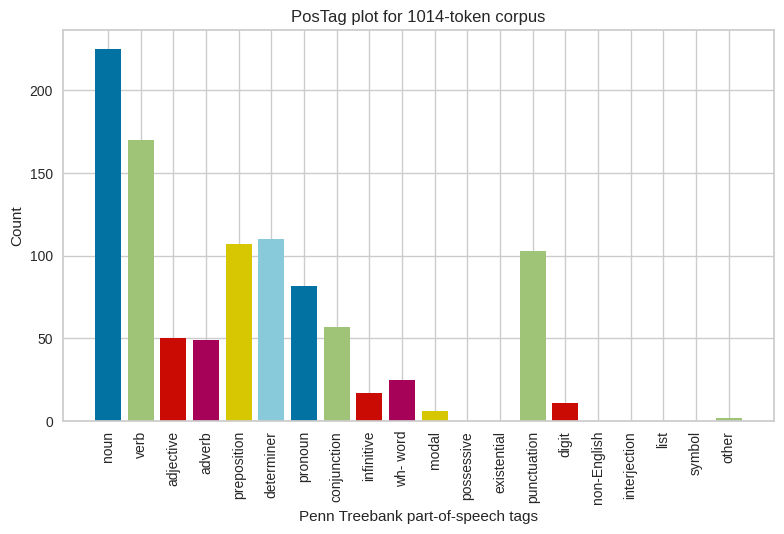

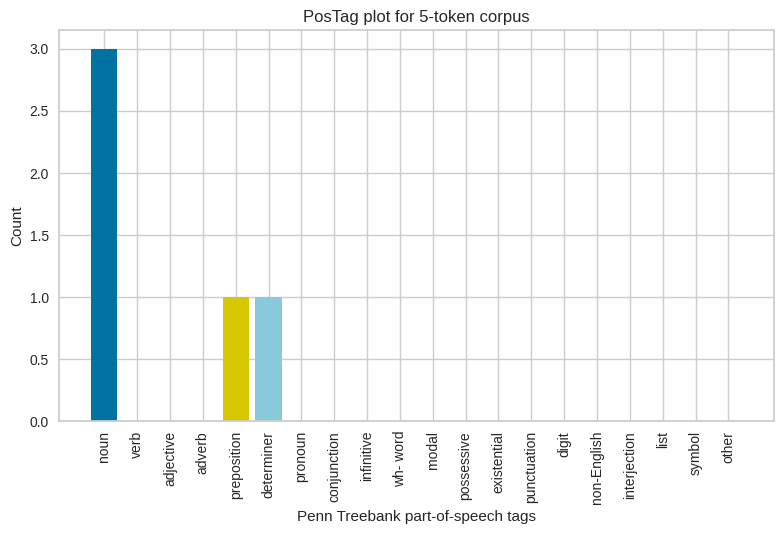

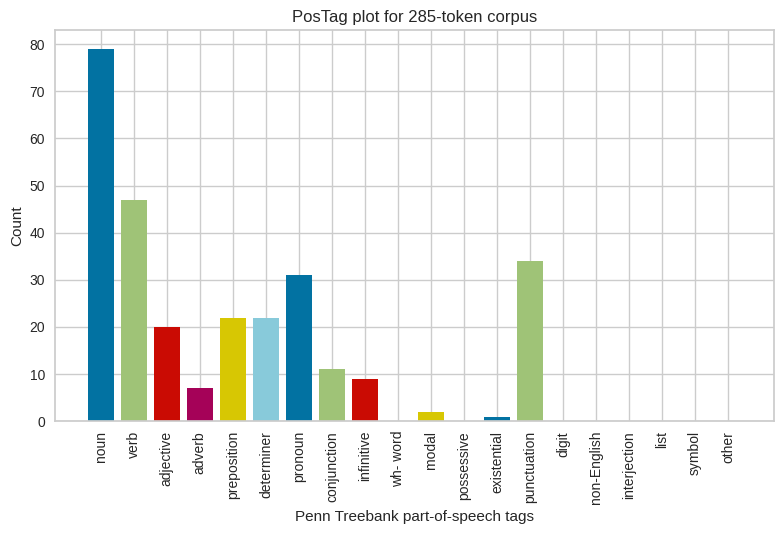

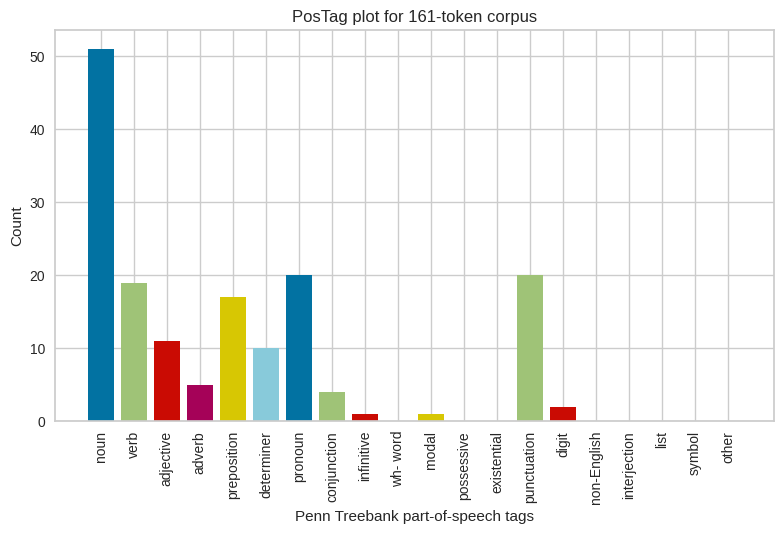

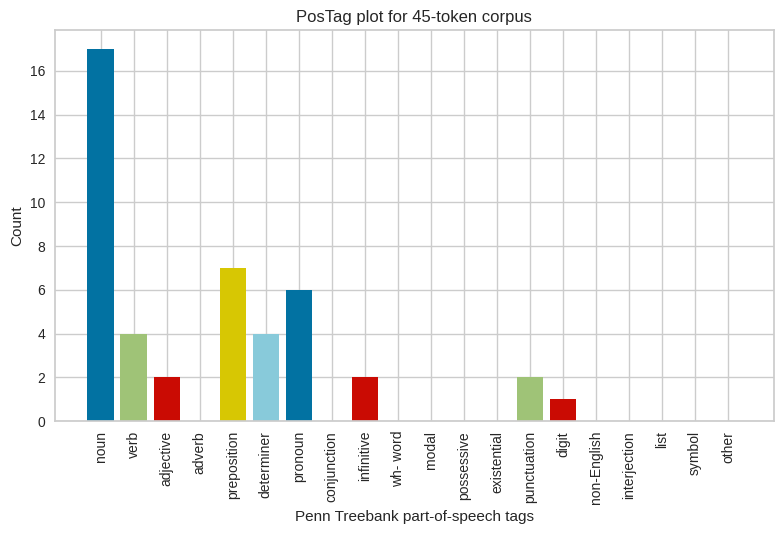

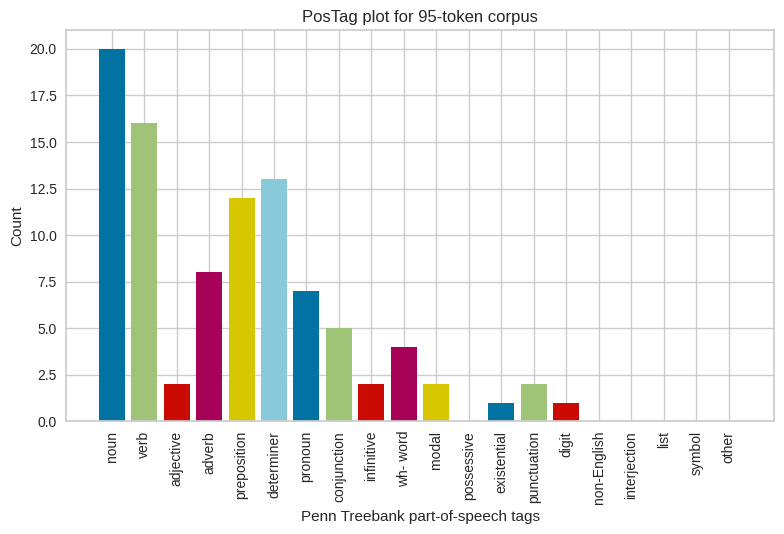

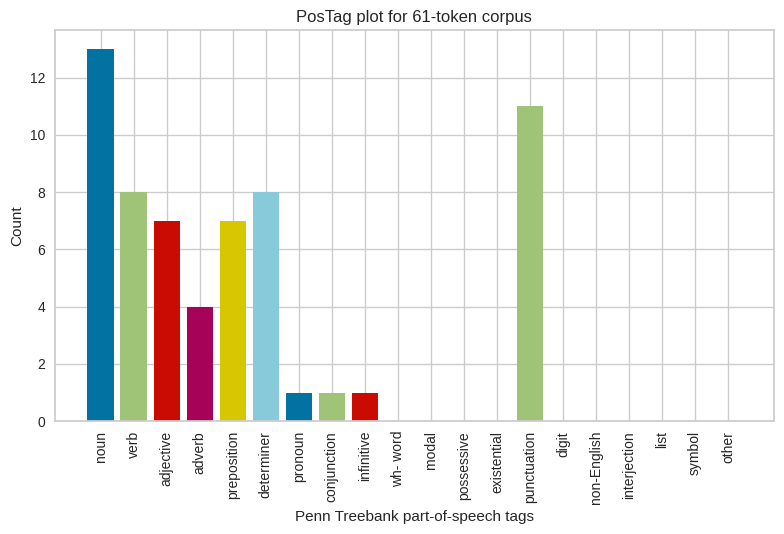

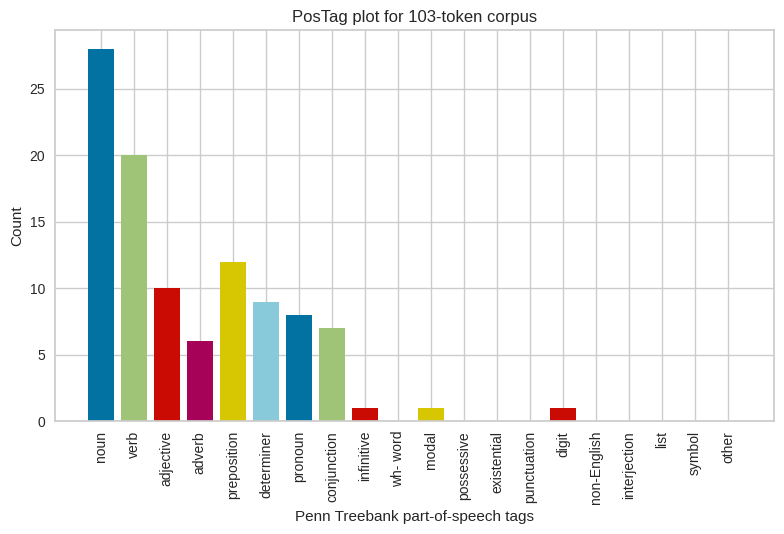

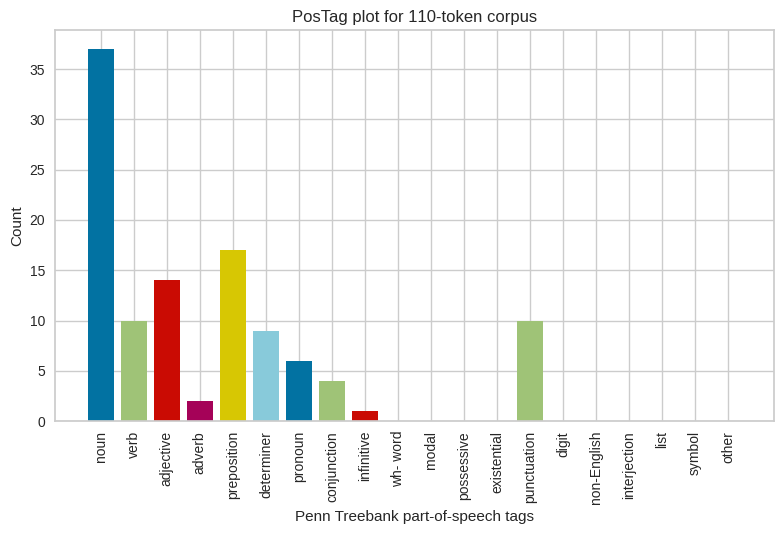

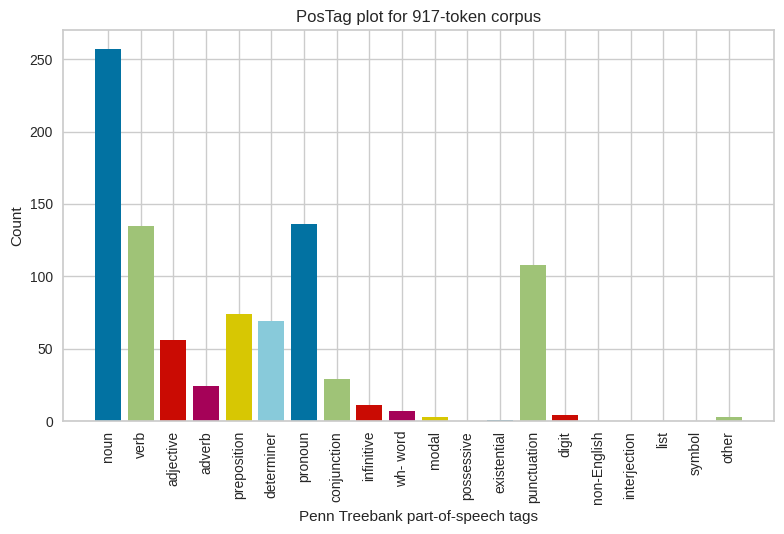

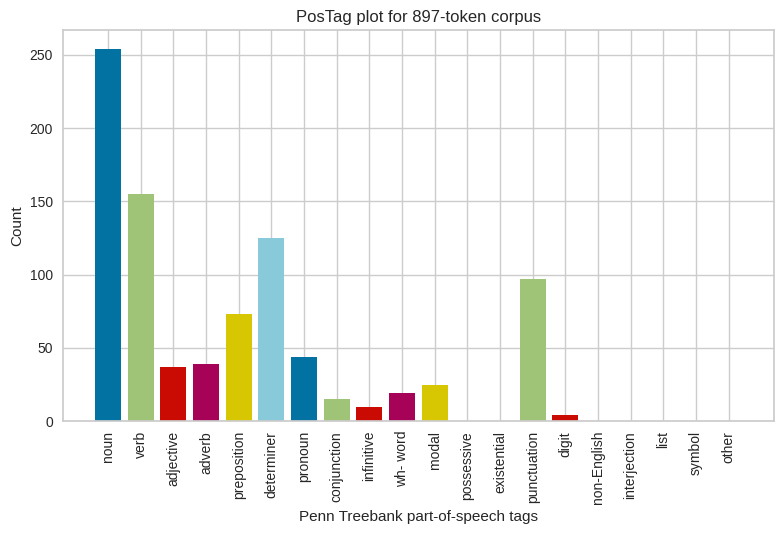

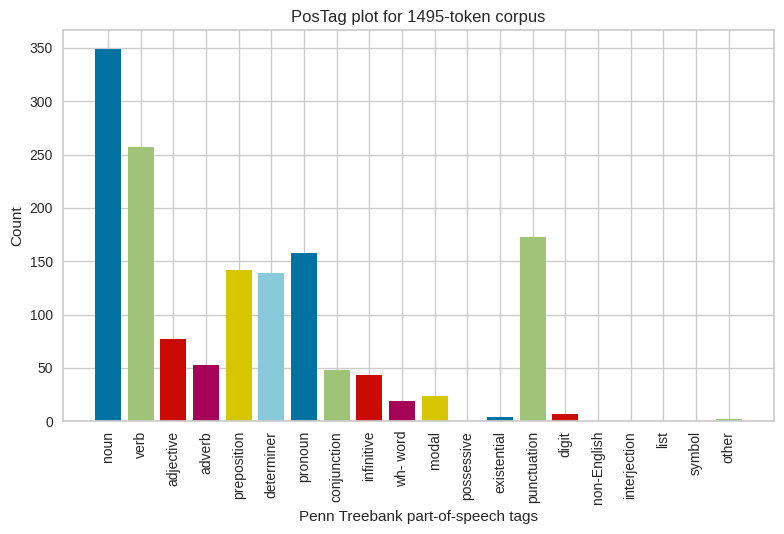

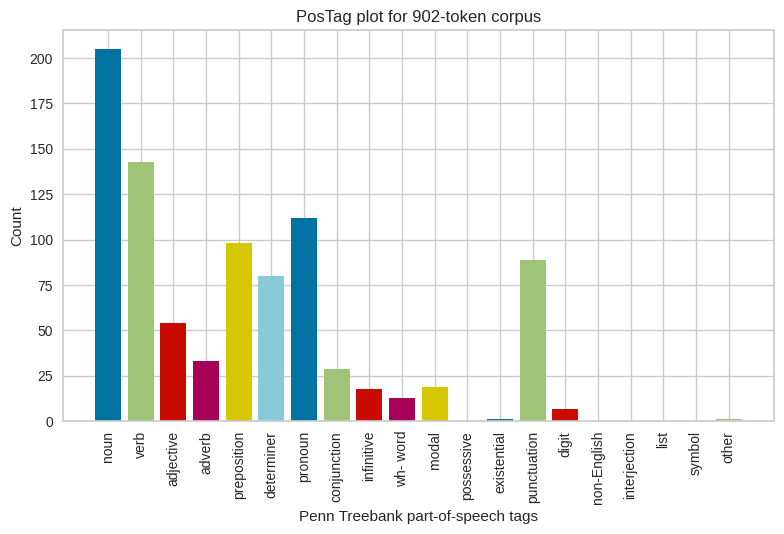

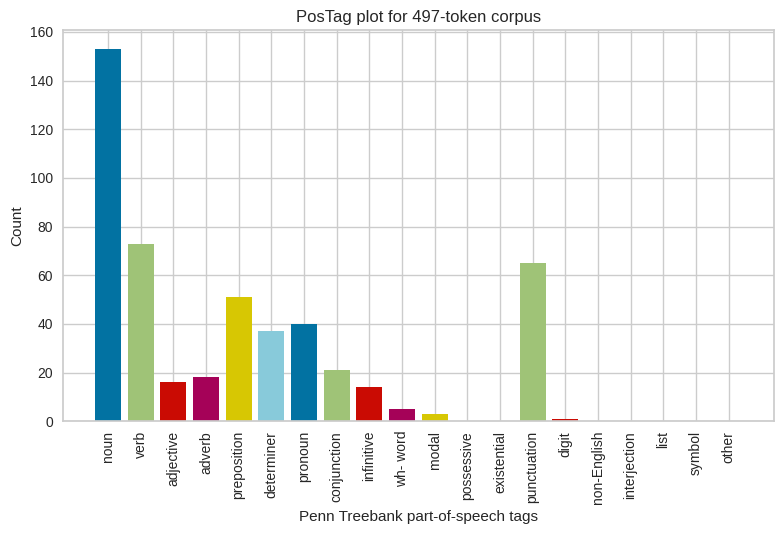

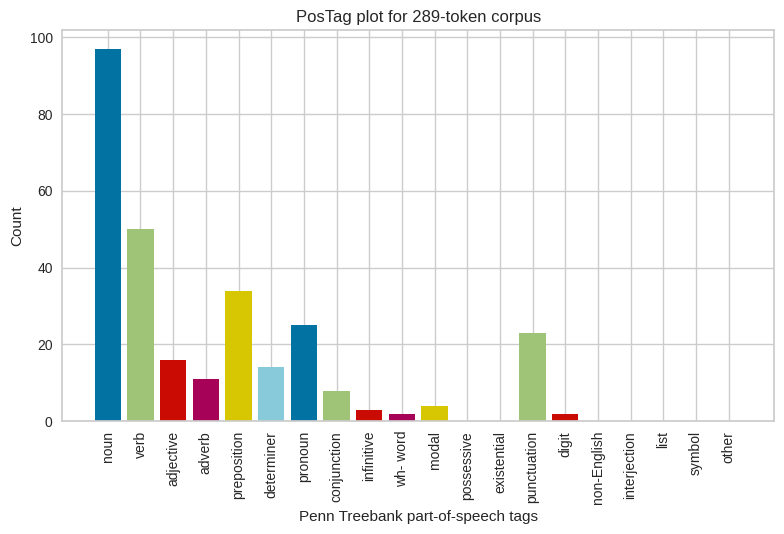

In [ ]:
for val in pushcart_poems_df['POS']:
  postag([[val]])

Plotting of non-push cart poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


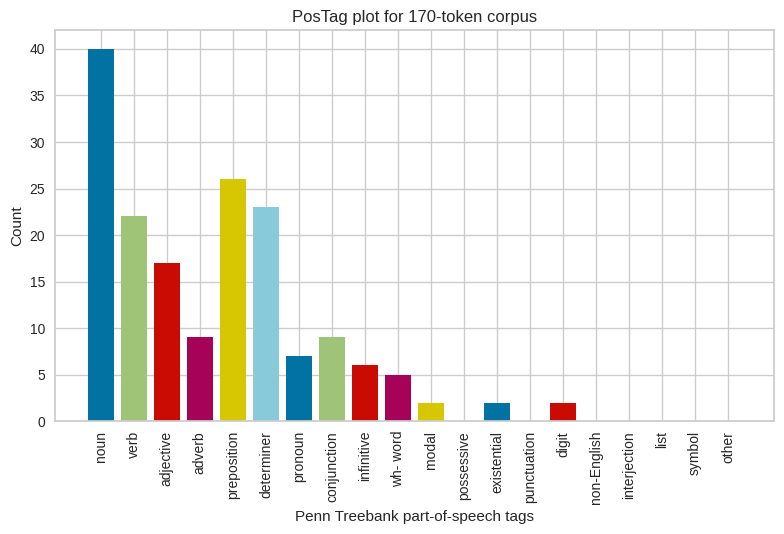

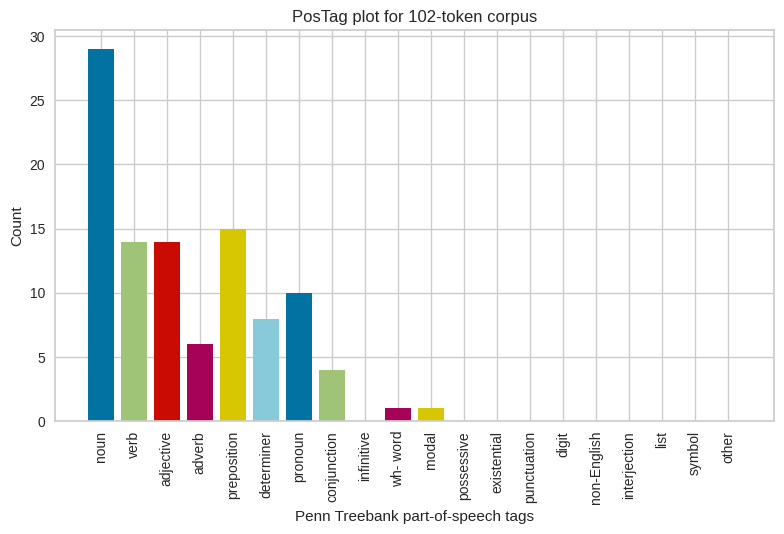

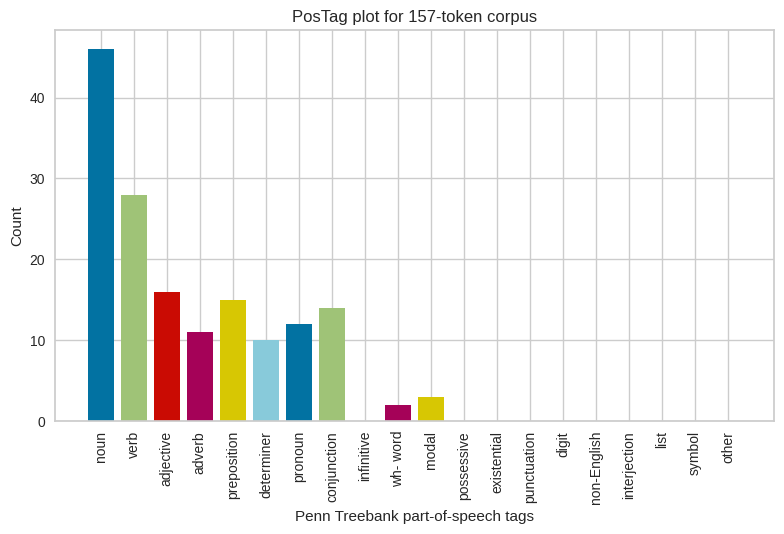

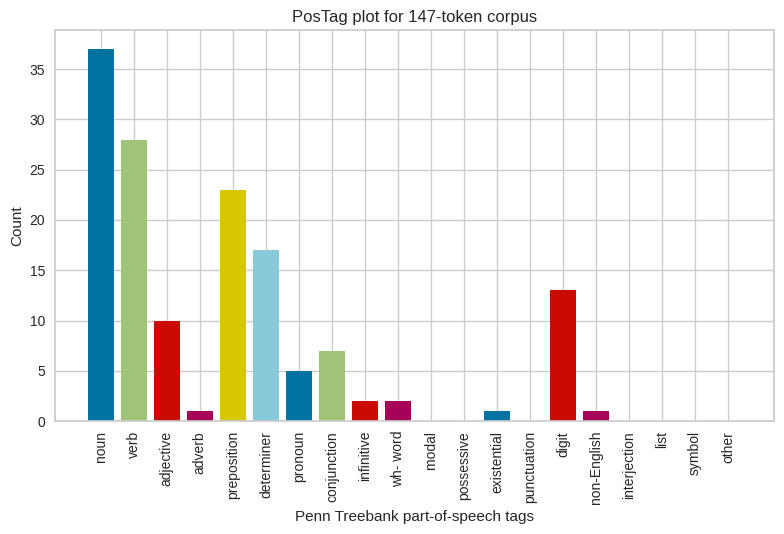

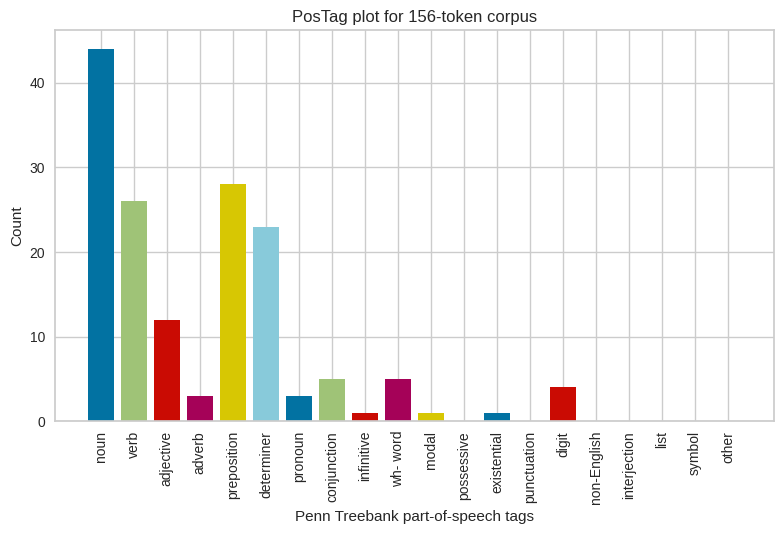

In [ ]:
for val in non_pushcart_poems_df['POS']:
  postag([[val]])

## Topic Analysis

In [ ]:
def choherence_perplexity_calculator(poem_list):
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

  data_words = list(sent_to_words(poem_list))

  print(data_words[:1])
  # Build the bigram and trigram models
  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

  # Faster way to get a sentence clubbed as a trigram/bigram
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  # See trigram example
  print(trigram_mod[bigram_mod[data_words[0]]])
  # Define functions for stopwords, bigrams, trigrams and lemmatization
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

  def make_bigrams(texts):
      return [bigram_mod[doc] for doc in texts]

  def make_trigrams(texts):
      return [trigram_mod[bigram_mod[doc]] for doc in texts]

  def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """https://spacy.io/api/annotation"""
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent))
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      return texts_out
  # Remove Stop Words
  #data_words_nostops = remove_stopwords(data_words)

  # Form Bigrams
  data_words_bigrams = make_bigrams(data_words)

  # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
  # python3 -m spacy download en
  nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

  # Do lemmatization keeping only noun, adj, vb, adv
  data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN']) #, 'ADJ', 'VERB', 'ADV'

  print(data_lemmatized[:1])
  # Create Dictionary
  id2word = corpora.Dictionary(data_lemmatized)

  # Create Corpus
  texts = data_lemmatized

  # Term Document Frequency
  corpus = [id2word.doc2bow(text) for text in texts]

  # View
  print(corpus[:1])


  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
  print(lda_model.print_topics())
  # Visualize the topics
  pyLDAvis.enable_notebook()
  vis = gensimvis.prepare(lda_model, corpus, id2word)
  # vis
  # Compute Perplexity
  print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

  # Compute Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('\nCoherence Score: ', coherence_lda)
  return vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ratios and coherence Score

In [ ]:
temp_pushcart = [val['poem'] for val in pushcart_poems]
pushcart_coh = choherence_perplexity_calculator(temp_pushcart)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['child', 'is', 'born', 'it', 'you', 'family', 'and', 'friends', 'stop', 'by', 'and', 'then', 'the', 'whole', 'neighborhood', 'it', 'seems', 'including', 'three', 'women', 'who', 'sit', 'in', 'the', 'corner', 'and', 'smile', 'and', 'nod', 'at', 'anyone', 'who', 'says', 'hello', 'though', 'mainly', 'they', 'keep', 'to', 'themselves', 'nibbling', 'the', 'cookies', 'someone', 'else', 'has', 'brought', 'and', 'sipping', 'tea', 'and', 'then', 'the', 'one', 'nearestthe', 'window', 'takes', 'ball', 'of', 'yarn', 'out', 'of', 'her', 'purseand', 'gives', 'it', 'to', 'the', 'one', 'in', 'the', 'middle', 'who', 'is', 'knitting', 'something', 'booties', 'little', 'cap', 'as', 'the', 'third', 'woman', 'just', 'sits', 'there', 'pair', 'of', 'scissors', 'in', 'her', 'lap', 'ten', 'years', 'later', 'and', 'you', 're', 'in', 'school', 'now', 'and', 'even', 'the', 'lunchroom', 'ladies', 'are', 'in', 'good', 'mood', 'as', 'you', 'step', 'toward', 'table', 'with', 'an', 'empty', 'place', 'and', 'an', 'ai

In [ ]:
pushcart_coh

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.049702  0.143403       1        1  29.499194
0      0.001506 -0.182965       2        1  27.734175
9     -0.151009  0.019445       3        1  19.942334
1      0.194476  0.053487       4        1  14.431782
8      0.015090 -0.006433       5        1   4.443419
2     -0.000150 -0.010355       6        1   1.951350
5     -0.004003  0.000749       7        1   1.686622
3     -0.001434 -0.005718       8        1   0.103708
4     -0.002482 -0.005919       9        1   0.103708
6     -0.002291 -0.005696      10        1   0.103708, topic_info=          Term       Freq      Total Category  logprob  loglift
476    visitor  11.000000  11.000000  Default  30.0000  30.0000
455   prisoner   8.000000   8.000000  Default  29.0000  29.0000
430     inmate   7.000000   7.000000  Default  28.0000  28.0000
145      world   4.000000   4.000000  Default  27.0000  27.0000
291  astronaut   7.000000   7.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
511       food   0.001841   5.083534  Topic10  -6.6423  -1.0523
52       floor   0.001840   4.413486  Topic10  -6.6429  -0.9115
114   shoulder   0.001837   3.980647  Topic10  -6.6444  -0.8099
91       nurse   0.001836   2.918787  Topic10  -6.6446  -0.4997
566       rice   0.001835   5.083521  Topic10  -6.6453  -1.0553

[544 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
214       1  0.800194  acceptance
1         1  0.959588    accident
285       1  0.275604         air
285       2  0.275604         air
285       3  0.551207         air
...     ...       ...         ...
145       7  0.244928       world
146       1  0.362087        year
146       2  0.362087        year
146       3  0.181044        year
602       3  0.839478    yourself

[296 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 10, 2, 9, 3, 6, 4, 5, 7])

### Non Pushcart

Ratios and Coherence Score

In [ ]:
# Assuming non_pushcart_poems is a DataFrame and 'poem' is the column containing poem text
temp_non_pushcart = non_pushcart_poems['poem'].tolist()

# Call the choherence_perplexity_calculator() function with the extracted poem texts
non_pushcart_coh = choherence_perplexity_calculator(temp_non_pushcart)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['of', 'love', 'for', 'fanny', 'brawne', 'the', 'girl', 'he', 'was', 'in', 'love', 'with', 'at', 'that', 'time', 'this', 'is', 'one', 'of', 'his', 'grecian', 'urn', 'poems', 'and', 'it', 'seems', 'to', 'be', 'about', 'the', 'same', 'subject', 'as', 'that', 'ode', 'but', 'in', 'very', 'different', 'style', 'indeed', 'there', 'is', 'not', 'the', 'same', 'sense', 'of', 'solemnity', 'here', 'as', 'in', 'that', 'beautiful', 'piece', 'rather', 'we', 'seem', 'to', 'be', 'in', 'the', 'midst', 'of', 'spring', 'and', 'summer', 'scenes', 'there', 'is', 'an', 'air', 'of', 'joyfulness', 'about', 'the', 'whole', 'conceit', 'and', 'even', 'when', 'we', 'come', 'to', 'those', 'passages', 'which', 'seem', 'to', 'contain', 'the', 'pang', 'of', 'regret', 'for', 'what', 'cannot', 'be', 'the', 'tone', 'is', 'not', 'mournful', 'but', 'tender', 'and', 'full', 'of', 'sad', 'enjoyment', 'such', 'as', 'men', 'feel', 'when', 'they', 'look', 'on', 'the', 'sweet', 'poisonous', 'poppy', 'or', 'remember', 'the', 'h

In [ ]:
import json

# Assuming non_pushcart_poems is a DataFrame and 'poem' is the column containing poem text
temp_non_pushcart = non_pushcart_poems['poem'].tolist()

# Call the choherence_perplexity_calculator() function with the extracted poem texts
non_pushcart_coh = choherence_perplexity_calculator(temp_non_pushcart)

try:
    # Attempt to serialize data to JSON
    json_data = json.dumps(non_pushcart_coh)
except TypeError as e:
    # Handle non-serializable objects
    def convert_to_serializable(obj):
        if isinstance(obj, complex):
            return str(obj)  # Convert complex numbers to strings
        # Add other conversion cases as needed

    # Serialize the data with custom conversion
    json_data = json.dumps(non_pushcart_coh, default=convert_to_serializable)

# Write the JSON data to a file or use it as needed
with open('non_pushcart_coh.json', 'w') as json_file:
    json_file.write(json_data)


[['of', 'love', 'for', 'fanny', 'brawne', 'the', 'girl', 'he', 'was', 'in', 'love', 'with', 'at', 'that', 'time', 'this', 'is', 'one', 'of', 'his', 'grecian', 'urn', 'poems', 'and', 'it', 'seems', 'to', 'be', 'about', 'the', 'same', 'subject', 'as', 'that', 'ode', 'but', 'in', 'very', 'different', 'style', 'indeed', 'there', 'is', 'not', 'the', 'same', 'sense', 'of', 'solemnity', 'here', 'as', 'in', 'that', 'beautiful', 'piece', 'rather', 'we', 'seem', 'to', 'be', 'in', 'the', 'midst', 'of', 'spring', 'and', 'summer', 'scenes', 'there', 'is', 'an', 'air', 'of', 'joyfulness', 'about', 'the', 'whole', 'conceit', 'and', 'even', 'when', 'we', 'come', 'to', 'those', 'passages', 'which', 'seem', 'to', 'contain', 'the', 'pang', 'of', 'regret', 'for', 'what', 'cannot', 'be', 'the', 'tone', 'is', 'not', 'mournful', 'but', 'tender', 'and', 'full', 'of', 'sad', 'enjoyment', 'such', 'as', 'men', 'feel', 'when', 'they', 'look', 'on', 'the', 'sweet', 'poisonous', 'poppy', 'or', 'remember', 'the', 'h

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['love', 'fanny', 'girl', 'love', 'time', 'urn', 'poem', 'subject', 'ode', 'style', 'sense', 'solemnity', 'piece', 'midst', 'spring', 'summer', 'scene', 'air', 'joyfulness', 'conceit', 'passage', 'pang', 'regret', 'tone', 'enjoyment', 'man', 'poppy', 'kiss', 'day', 'stanza', 'poet', 'flower', 'sunshine', 'sorrow', 'pang', 'love']]
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]
[(0, '0.008*"line" + 0.008*"poem" + 0.008*"foot" + 0.008*"syllable" + 0.008*"day" + 0.008*"ward" + 0.008*"dew" + 0.008*"soul" + 0.008*"thine" + 0.008*"woe"'), (1, '0.041*"love" + 0.028*"pang" + 0.028*"day" + 0.028*"eye" + 0.028*"midst" + 0.014*"stanza" + 0.014*"summer" + 0.014*"passage" + 0.014*"man" + 0.014*"subject"'), (2, '0.008*"line" + 0.008*"syllable" + 0.008*"poet" +

## Sentiment Analysis

In [ ]:
sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def plot_sentiments(arr):
  figure, axis = plt.subplots(4, 4, figsize=(15, 15))
  j = 0
  figure.tight_layout(pad=2)
  for i in range(4):
    while j < min(len(arr), (i + 1) * 4):
      title, vals = arr[j]
      axis[i, j % 4].bar(list(vals.keys()), list(vals.values()))
      axis[i, j % 4].set_title(title)
      j += 1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Pushcart Poems

In [ ]:
import numpy as np
pushcart_sentiment = []

i = 1
for poem in temp_pushcart:
    scores = sid.polarity_scores(poem)
    print(poem)
    print(scores)
    print()
    pushcart_sentiment.append(('Poem ' + str(i), scores))
    i += 1

A child is born. It’s you! Family and friends stop by and then the whole neighborhood, it seems, including three women who sit in the corner and smile and nod at anyone who says hello, though mainly they keep to themselves, nibbling the cookies someone else has brought and sipping tea, and then the one nearestthe window takes a ball of yarn out of her purseand gives it to the one in the middle, who is knitting something—booties? a little cap?—as the third woman just sits there, a pair of scissors in her lap. Ten years later and you’re in school now, and even the lunchroom ladies are in a good mood as you step toward a table with an empty place, and an aide says Let me clean that for you and wipes the table down and pats you on the shoulder before she heads to the break room where her two friends wait. Your first job? You’re behind the counter in a department store, showing a watch to a woman who’s buying someone a present, and she pays you and puts the watch in her purse and waves to a

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Plotting of Pushcart sentiments

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


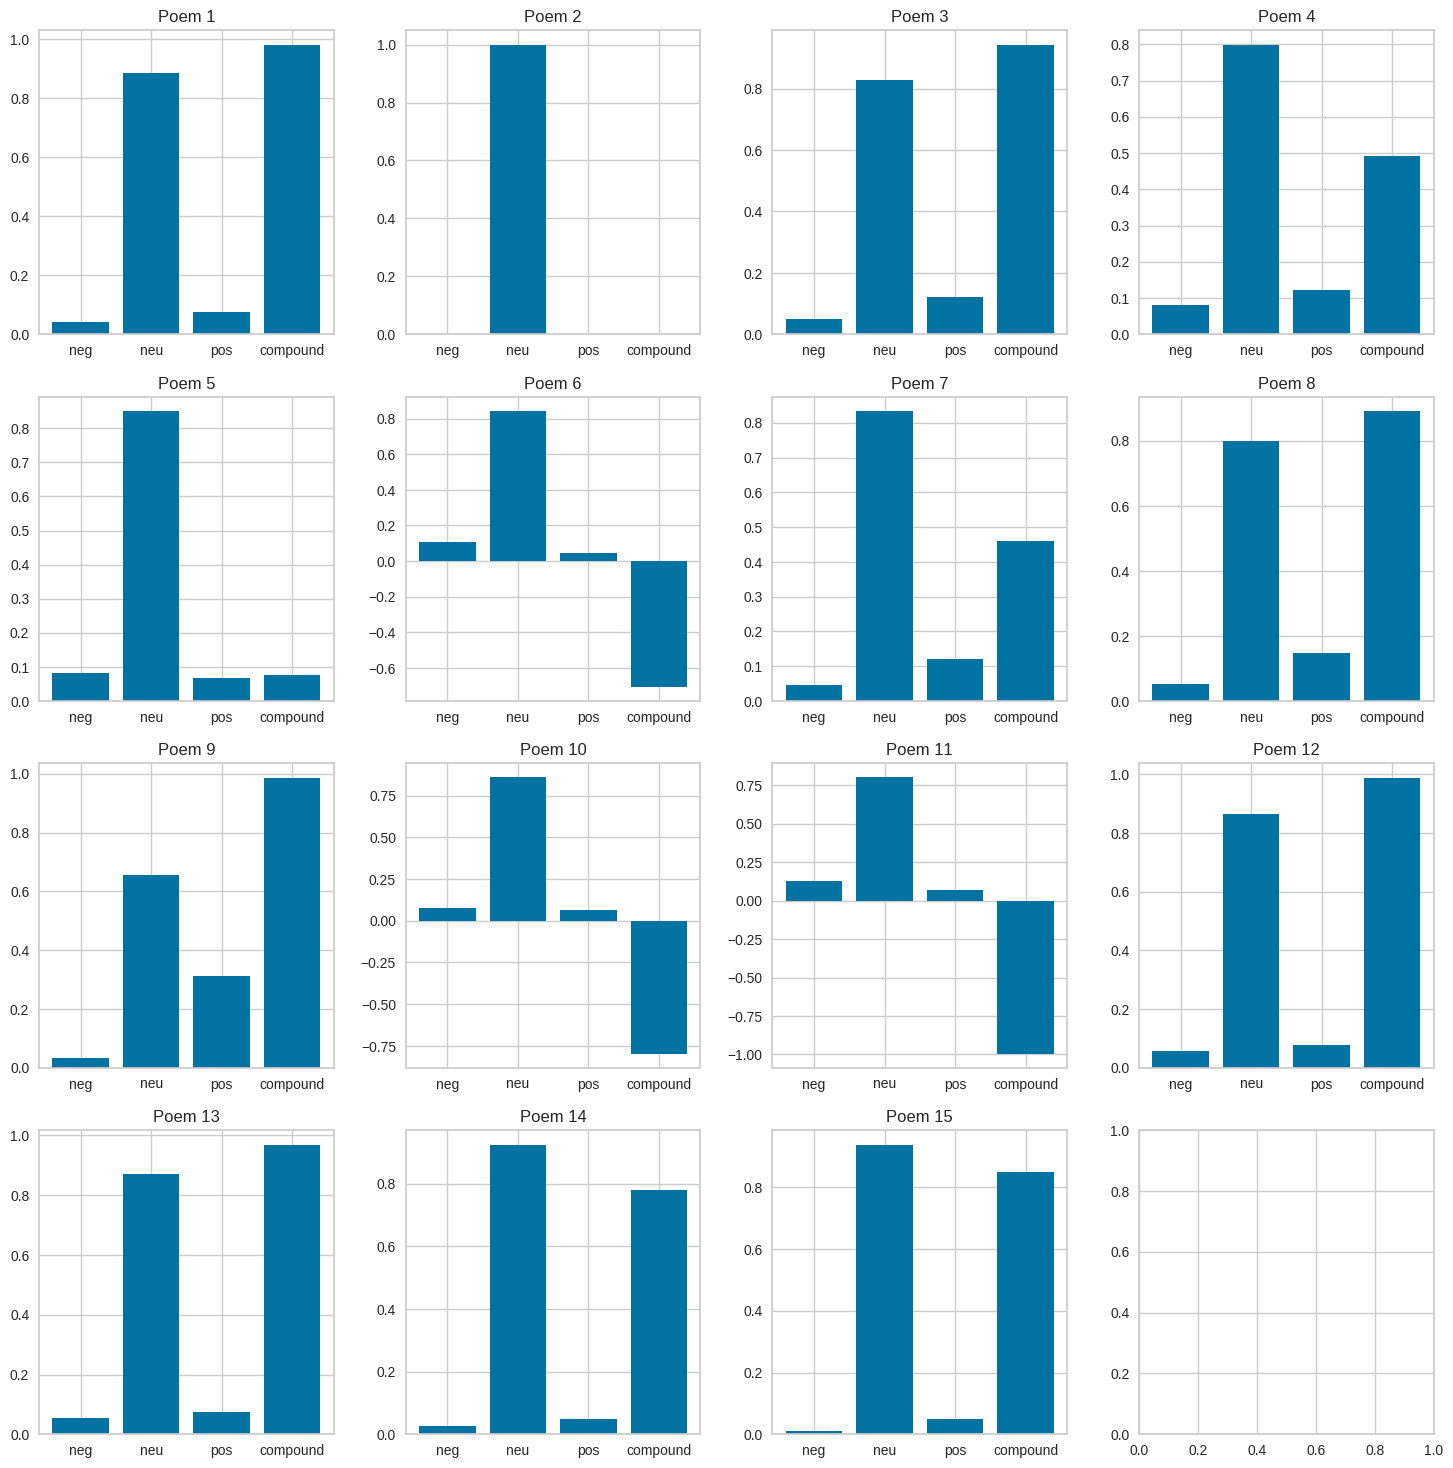

In [ ]:
plot_sentiments(pushcart_sentiment)

### Non Pushcart Poems

In [ ]:
non_pushcart_sentiment = []
i = 1
for poem in temp_non_pushcart:
    scores = sid.polarity_scores(poem)
    print(poem)
    print(scores)
    print()
    non_pushcart_sentiment.append(('Poem ' + str(i), scores))
    i += 1

 of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love
{'neg': 0.108, 'neu': 0.649, 'pos': 0.243, 'compound': 0.9876}



O soft embalmer of the still midnight shutting with careful

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Ploting of non - pushcart poems

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


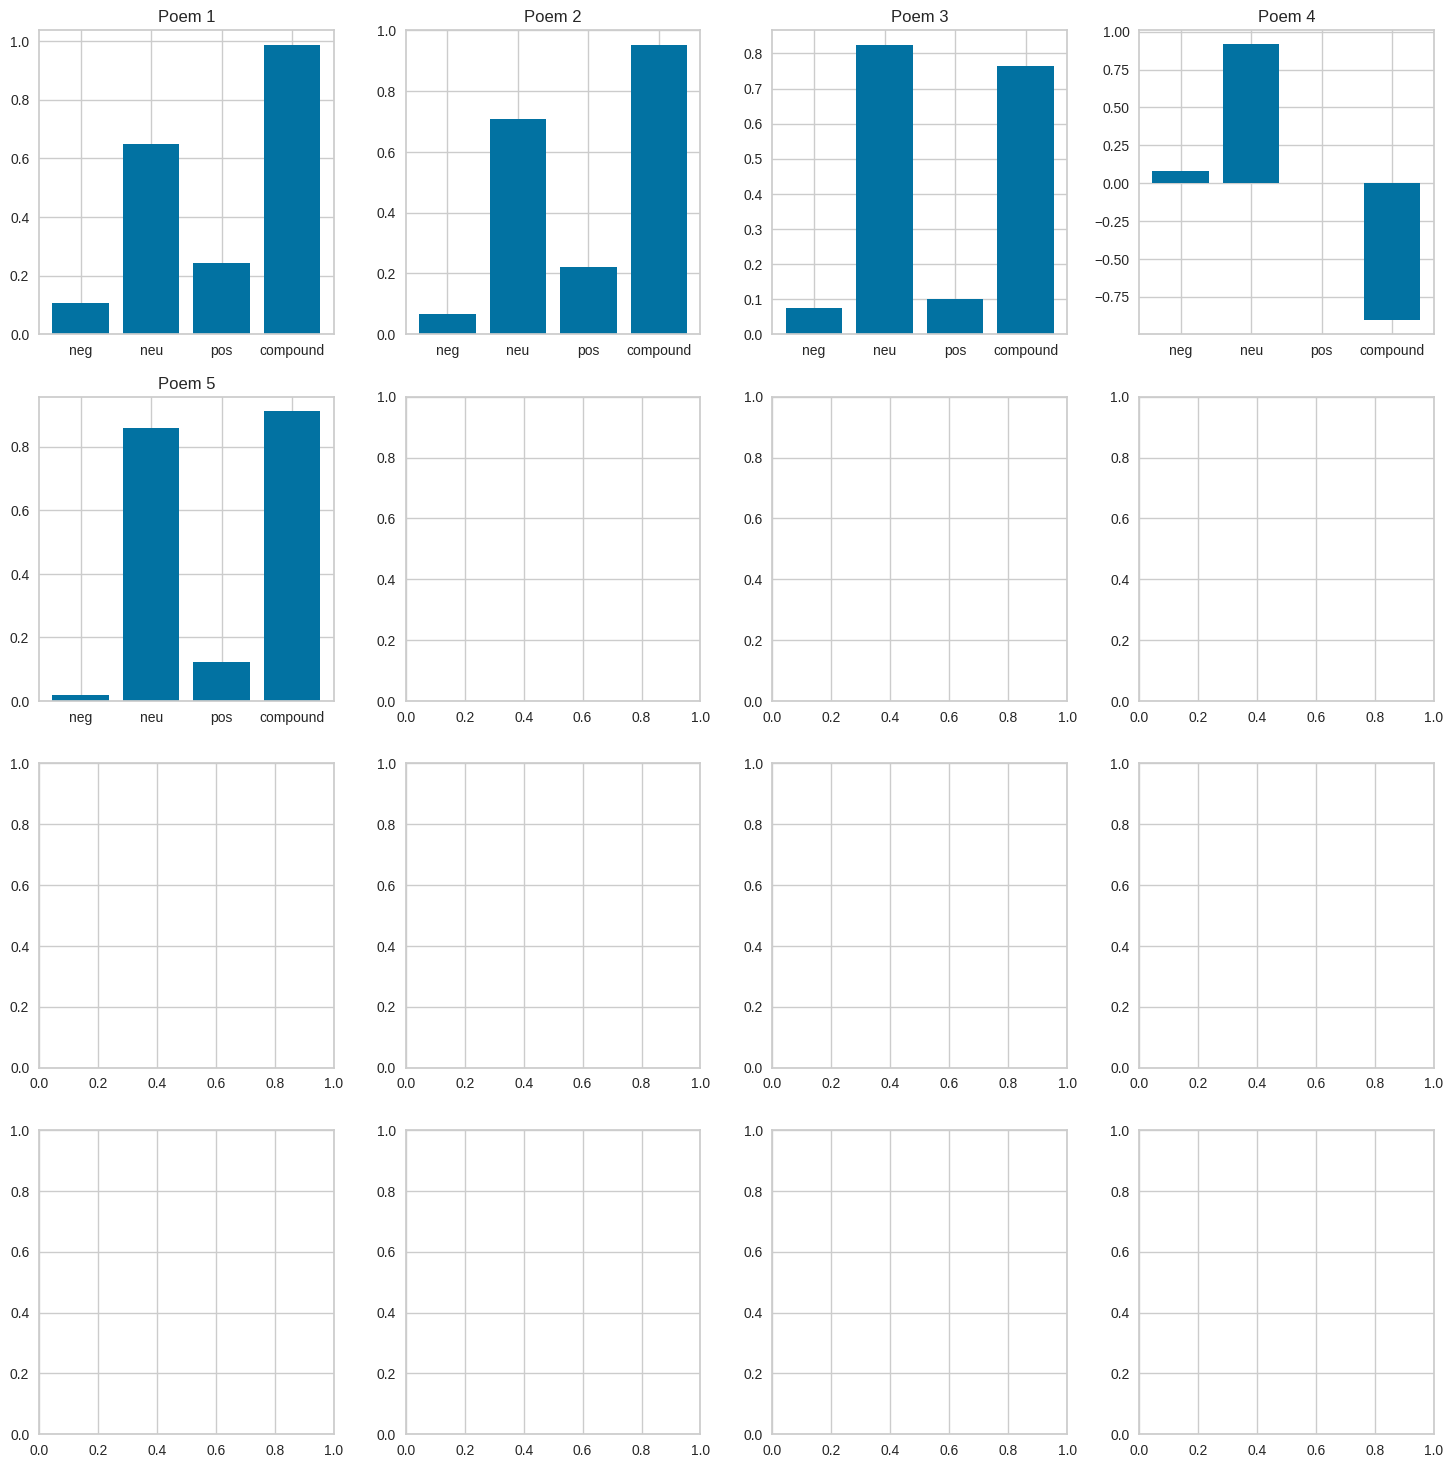

In [ ]:
plot_sentiments(non_pushcart_sentiment)

##4. write function that takes a .txt file and generates the POS, KG using networkx and transitive closure

Knowledge Graphs

In [ ]:
def create_corpus(df):
  poem_tokens = [noun + adj for noun, adj in zip(df['Nouns'], df['Adjective'])]
  tokenfreq_dict = gensim.corpora.Dictionary(poem_tokens) # make a dictionary of id to word mapping for every token in every poem
  poem_corpus = [tokenfreq_dict.doc2bow(poem) for poem in poem_tokens] # make a corpus representing the frequency of occurence (of every token in a poem) in the dictionary (created previously)

  return tokenfreq_dict, poem_corpus


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def create_corpus1(df):
  poem_tokens = [noun + adj for noun, adj in zip(df['Noun'], df['Adjective'])]
  tokenfreq_dict = gensim.corpora.Dictionary(poem_tokens) # make a dictionary of id to word mapping for every token in every poem
  poem_corpus = [tokenfreq_dict.doc2bow(poem) for poem in poem_tokens] # make a corpus representing the frequency of occurence (of every token in a poem) in the dictionary (created previously)

  return tokenfreq_dict, poem_corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pushcart_word_dict, pushcart_corpus = create_corpus(pushcart_poems_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_word_dict, non_pushcart_corpus = create_corpus1(non_pushcart_poems_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_poems_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


POS  \
0  [(of, IN), (love, NN), (for, IN), (fanny, JJ),...   
1  [(O, NNP), (soft, JJ), (embalmer, NN), (of, IN...   
2  [(rise, NN), (and, CC), (the, DT), (beauty, NN...   
3  [(fall, NN), (is, VBZ), (known, VBN), (as, IN)...   
4  [(as, IN), (gods, NNS), (and, CC), (goddesses,...   

                                                Verb  \
0  [was, is, seems, be, is, seem, be, is, come, s...   
1  [midnight, shutting, benign, eyes, enshaded, p...   
2  [words., is, ail, loitering, is, withered, sin...   
3  [is, known, was, written, published, begins, s...   
4  [has, used, describe, are, temple., says, have...   

                                           Adjective  \
0  [fanny, grecian, same, different, same, beauti...   
1  [soft, careful, forgetfulness, soothest, thee,...   
2  [simple, explanation:, wretched, haggard, woe,...   
3  [february, unstressed, metrical, first, third,...   
4  [deep, blissful, abab, other, last, same, diff...   

                                              Adverb  \
0  [very, indeed, not, here, rather, even, not, m...   
1           [still, close, ere, then, still, deftly]   
2  [alone, palely, wight, so, so, lily, too, long...   
3                                             [only]   
4                                    [forever, deep]   

                                                Noun  
0  [love, brawne, girl, love, time, urn, poems, s...  
1  [O, embalmer, fingers, gloom, pleas, embower, ...  
2  [rise, beauty, nature, following, poem, ah, th...  
3  [fall, solitude, poem, death, line, syllables,...  
4  [gods, goddesses, love, other., poet, metaphor...

### Pushcart LDA Model

In [ ]:
pushcart_ldamodel_poem = gensim.models.ldamodel.LdaModel(corpus=pushcart_corpus, num_topics=5, id2word=pushcart_word_dict, passes=15, iterations=10, random_state=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pushcart_ldamodel_poem.show_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.030*"’" + 0.016*"t" + 0.013*"s" + 0.012*"father" + 0.012*"mother" + 0.007*"Review" + 0.006*"time" + 0.005*"hands" + 0.005*"carrots" + 0.005*"face"'),
 (1,
  '0.020*"’" + 0.012*"t" + 0.011*"visitors" + 0.011*"prisoner" + 0.009*"s" + 0.009*"inmate" + 0.007*"world" + 0.007*"man" + 0.007*"visitor" + 0.007*"brother"'),
 (2,
  '0.009*"Review" + 0.008*"’" + 0.006*"color" + 0.006*"Brasil" + 0.006*"Magazine" + 0.004*"mother" + 0.004*"s" + 0.004*"school" + 0.004*"”" + 0.004*"skin"'),
 (3,
  '0.012*"’" + 0.012*"Forgive" + 0.009*"God" + 0.007*"s" + 0.007*"Simon" + 0.005*"t" + 0.005*"”" + 0.005*"“" + 0.005*"wings" + 0.005*"grandmother"'),
 (4,
  '0.016*"home" + 0.014*"’" + 0.014*"time" + 0.012*"astronaut" + 0.010*"”" + 0.009*"rice" + 0.009*"school" + 0.007*"t" + 0.007*"s" + 0.007*"mother"')]

In [ ]:
pushcart_topic_keyword_str_list = []
for i in range(5):
  top_topic_keywords = pushcart_ldamodel_poem.show_topic(i, topn=12)
  keywords = ", ".join(keyword for keyword, prob in top_topic_keywords)
  pushcart_topic_keyword_str_list.append(keywords)
  print(keywords)

’, t, s, father, mother, Review, time, hands, carrots, face, door, table
’, t, visitors, prisoner, s, inmate, world, man, visitor, brother, life, little
Review, ’, color, Brasil, Magazine, mother, s, school, ”, skin, sun, “
’, Forgive, God, s, Simon, t, ”, “, wings, grandmother, flames, wick
home, ’, time, astronaut, ”, rice, school, t, s, mother, place, sapling


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Non Pushcart LDA Model

In [ ]:
non_pushcart_ldamodel_poem= gensim.models.ldamodel.LdaModel(corpus=non_pushcart_corpus, num_topics=5, id2word=non_pushcart_word_dict, passes=15, iterations=10, random_state=5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
non_pushcart_ldamodel_poem.show_topics(num_words=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.005*"thee" + 0.005*"sweet" + 0.005*"poem" + 0.005*"thy" + 0.005*"full" + 0.005*"faery" + 0.005*"beautiful" + 0.005*"same" + 0.005*"wild" + 0.005*"love"'),
 (1,
  '0.005*"lines" + 0.005*"poem" + 0.005*"love" + 0.005*"stanza" + 0.005*"full" + 0.005*"poet" + 0.005*"thy" + 0.005*"line" + 0.005*"thee" + 0.005*"last"'),
 (2,
  '0.020*"love" + 0.020*"full" + 0.020*"sweet" + 0.014*"same" + 0.014*"beautiful" + 0.014*"wild" + 0.014*"faery" + 0.014*"thy" + 0.014*"thee" + 0.007*"poem"'),
 (3,
  '0.014*"thee" + 0.014*"thy" + 0.014*"poppy" + 0.014*"eyes" + 0.014*"day" + 0.014*"midst" + 0.014*"casket" + 0.014*"charities" + 0.014*"divine" + 0.014*"key"'),
 (4,
  '0.036*"poem" + 0.036*"lines" + 0.022*"stanza" + 0.022*"line" + 0.015*"poet" + 0.015*"last" + 0.015*"scheme" + 0.015*"first" + 0.015*"gods" + 0.015*"sonnet"')]

In [ ]:
non_pushcart_topic_keyword_str_list = []
for i in range(4):
  top_topic_keywords = non_pushcart_ldamodel_poem.show_topic(i, topn=12)
  keywords = ", ".join(keyword for keyword, prob in top_topic_keywords)
  non_pushcart_topic_keyword_str_list.append(keywords)
  print(keywords)

thee, sweet, poem, thy, full, faery, beautiful, same, wild, love, last, foot
lines, poem, love, stanza, full, poet, thy, line, thee, last, same, sweet
love, full, sweet, same, beautiful, wild, faery, thy, thee, poem, poet, last
thee, thy, poppy, eyes, day, midst, casket, charities, divine, key, soothest, wards


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Getting Relations

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/344 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

In [ ]:
def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class KB():
    def __init__(self):
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def merge_relations(self, r1):
        r2 = [r for r in self.relations
              if self.are_relations_equal(r1, r)][0]
        spans_to_add = [span for span in r1["meta"]["spans"]
                        if span not in r2["meta"]["spans"]]
        r2["meta"]["spans"] += spans_to_add

    def add_relation(self, r):
        if not self.exists_relation(r):
            self.relations.append(r)
        else:
            self.merge_relations(r)

    def print(self):
        print("Relations:")
        for r in self.relations:
            print(f"  {r}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def from_text_to_kb(text,span_length=128, verbose=False):
    # tokenize whole text
    inputs = tokenizer([text], return_tensors="pt")

    # compute span boundaries
    num_tokens = len(inputs["input_ids"][0])
    if verbose:
        print(f"Input has {num_tokens} tokens")
    num_spans = math.ceil(num_tokens / span_length)
    if verbose:
        print(f"Input has {num_spans} spans")
    overlap = math.ceil((num_spans * span_length - num_tokens) /
                        max(num_spans - 1, 1))
    spans_boundaries = []
    start = 0
    for i in range(num_spans):
        spans_boundaries.append([start + span_length * i,
                                 start + span_length * (i + 1)])
        start -= overlap
    if verbose:
        print(f"Span boundaries are {spans_boundaries}")

    # transform input with spans
    tensor_ids = [inputs["input_ids"][0][boundary[0]:boundary[1]]
                  for boundary in spans_boundaries]
    tensor_masks = [inputs["attention_mask"][0][boundary[0]:boundary[1]]
                    for boundary in spans_boundaries]
    inputs = {
        "input_ids": torch.stack(tensor_ids),
        "attention_mask": torch.stack(tensor_masks)
    }

    # generate relations
    num_return_sequences = 3
    gen_kwargs = {
        "max_length": 256,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": num_return_sequences
    }
    generated_tokens = model.generate(
        **inputs,
        **gen_kwargs,
    )

    # decode relations
    decoded_preds = tokenizer.batch_decode(generated_tokens,
                                           skip_special_tokens=False)

    # create kb
    kb = KB()
    i = 0
    for sentence_pred in decoded_preds:
        current_span_index = i // num_return_sequences
        relations = extract_relations_from_model_output(sentence_pred)
        for relation in relations:
            relation["meta"] = {
                "spans": [spans_boundaries[current_span_index]]
            }
            kb.add_relation(relation)
        i += 1

    return kb


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def save_network_html(kb, filename="file.html"):
    # create network
    net = Network(notebook=True, cdn_resources='in_line',directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    #nodes
    node_map = {}
    i = 0

    r = lambda: random.randint(0,255)

    for val in kb.relations:
      if val["head"] not in node_map:
        node_map[val["head"]] = i
        i+=1

      if val["tail"] not in node_map:
        node_map[val["tail"]] = i
        i+=1


    for node, i in node_map.items():
      net.add_node(i, label = node, color = '#%02X%02X%02X' % (r(),r(),r()))

    # edges
    for r in kb.relations:
        net.add_edge(node_map[r["head"]], node_map[r["tail"]])

    # save network
    net.repulsion(
        node_distance=200,
        central_gravity=0.2,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09
    )

    # net.set_edge_smooth('dynamic')
    net.show(filename)
    display(HTML(filename=filename))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def save_kb(kb, filename):
    with open(filename, "wb") as f:
        pickle.dump(kb, f)

def load_kb(filename):
    res = None
    with open(filename, "rb") as f:
        res = pickle.load(f)
    return res

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Plotting the graphs - Pushcart

#### Poem 1

In [ ]:
kb_pushcart= from_text_to_kb(temp_pushcart[0], verbose=True)
filename = "pushcart1"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Token indices sequence length is longer than the specified maximum sequence length for this model (1089 > 1024). Running this sequence through the model will result in indexing errors


Input has 1089 tokens
Input has 9 spans
Span boundaries are [[0, 128], [120, 248], [240, 368], [360, 488], [480, 608], [600, 728], [720, 848], [840, 968], [960, 1088]]


#### Poem 2

In [ ]:
kb_pushcart= from_text_to_kb(temp_pushcart[1], verbose=True)
filename = "pushcart2"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 8 tokens
Input has 1 spans
Span boundaries are [[0, 128]]


#### Poem 3

In [ ]:
kb_pushcart= from_text_to_kb(temp_pushcart[2], verbose=True)
filename = "pushcart3"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 317 tokens
Input has 3 spans
Span boundaries are [[0, 128], [94, 222], [188, 316]]


#### Poem 4

In [ ]:
kb_pushcart= from_text_to_kb(temp_pushcart[3], verbose=True)
filename = "pushcart4"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 191 tokens
Input has 2 spans
Span boundaries are [[0, 128], [63, 191]]


### Plotting the graphs - Non Pushcart

#### Poem 1

In [ ]:
kb_pushcart= from_text_to_kb(temp_non_pushcart[0], verbose=True)
filename = "non_pushcart1"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 190 tokens
Input has 2 spans
Span boundaries are [[0, 128], [62, 190]]


#### Poem 2

In [ ]:
kb_pushcart= from_text_to_kb(temp_non_pushcart[1], verbose=True)
filename = "non_pushcart2"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 124 tokens
Input has 1 spans
Span boundaries are [[0, 128]]


#### Poem 3

In [ ]:
kb_pushcart= from_text_to_kb(temp_non_pushcart[2], verbose=True)
filename = "non_pushcart3"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 186 tokens
Input has 2 spans
Span boundaries are [[0, 128], [58, 186]]


#### Poem 4

In [ ]:
kb_pushcart= from_text_to_kb(temp_non_pushcart[3], verbose=True)
filename = "non_pushcart4"
filename_html = filename + ".html"
save_kb(kb_pushcart, filename + ".p")
save_network_html(kb_pushcart, filename=filename_html)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Input has 176 tokens
Input has 2 spans
Span boundaries are [[0, 128], [48, 176]]


##5. how do you combine KG and vector dbs?

a. choose 3 articles, one that has high degree of overlap, one that has none, one that is in the middle
b. 3 articles --> kg --> <???> embedding --> store in the vector db
c. then retrieve the articles based on the poem as a query

fetching the articles and storing them into vector Db

In [ ]:
vector_db.similarity_search(
    "Which are tools to bolster your mental health?", k=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[Document(page_content=" contemplate the redemptive aspects of adversity, emphasizing the potential for growth and self-discovery amid life's inevitable challenges.", metadata={'source': 'articles'}),
 Document(page_content=' seer leaves and twigs might all be heard magic sleep comfortable bird that broodest over the troubled sea of the mind till it is hush and smooth unconfin restraint imprisoned liberty great key to golden palaces strange minstrelsy fountains grotesque new trees bespangled caves echoing grottos full of tumbling waves and moonlight aye to all the mazy world of silvery enchantment —who upfurl beneath thy drowsy wing triple hour but renovates and lives —thus in the bower endymion was calm to life again opening his eyelids with healthier brain he said feel this thine end', metadata={'source': 'poems'}),
 Document(page_content='John Keats\'s concept of "soul-making" profoundly informed his poetic vision, providing a philosophical framework for his exploration of suffering

In [ ]:
# specify model huggingface mode name
model_name = "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175"

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/utils/hub.py:374: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


In [ ]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "/content/drive/MyDrive/poets/mistral-journal-finetune/checkpoint-175/")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# specify stop token ids
stop_token_ids = [0]

# build huggingface pipeline for using zephyr-7b-alpha
pipeline = pipeline(
    "text-generation",
    model=ft_model,
    tokenizer=tokenizer,
    use_cache=True,
    device_map="auto",
    max_length=2048,
    do_sample=True,
    top_k=5,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
    pad_token_id=tokenizer.eos_token_id,
)

# specify the llm
llm = HuggingFacePipeline(pipeline=pipeline)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GP

In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm, chain_type="stuff", retriever=vector_db.as_retriever()
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on Articles Reponse given by model (Questions to Model)

In [ ]:
response = qa_chain.run(
    "How does one increase their mental health?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' One way to improve mental health is through meditation. Meditation has been found to increase self-awareness, reduce stress, and improve focus and concentration. Additionally, spending time in nature or engaging in creative pursuits can help promote a sense of well-being and contentment. Seeking support from mental health professionals or joining a support group can also be beneficial in managing mental health challenges.'

In [ ]:
response = qa_chain.run(
    "explian john keats participation in wars?")
response



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\nJohn Keats did not participate in any wars directly, but the Napoleonic Wars and other geopolitical events of his time undoubtedly influenced his poetic themes and expressions. The aftermath of the French Revolution and the prolonged conflict with Napoleon Bonaparte cast a shadow over Keats's formative years and likely impacted his poetic reflections on human suffering, resilience, and the transient nature of peace. The wars' geopolitical upheavals and societal disquiet may have resonated in Keats's poetry, shaping his portrayal of the human condition in relation to larger historical and political forces at play. While Keats did not actively participate in the wars, the profound influence of such tumultuous events on his poetic expressions cannot be understated."

In [ ]:
response = qa_chain.run(
    "Describe John Keats dying moment?")
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" John Keats died on February 23, 1821, at the age of 25, in Rome, Italy. He was buried in the Protestant Cemetery in Rome, which later became known as the Keats-Shelley Memorial. In his final days, Keats was cared for by his friend Joseph Severn. Keats's health had declined rapidly in the previous months due to tuberculosis. On the morning of his death, Keats awoke with a high fever and struggled to breathe. Severn administered laudanum to ease his suffering and Keats drifted in and out of consciousness throughout the day. In the evening, Keats's doctor, Doctor Hamilton, visited and found the poet delirious and barely conscious. He gave Keats a stimulant in an attempt to rouse him, but to no avail. Around midnight, Keats passed away with Severn at his side. Severn later wrote an account of Keats's last moments, which was published in The Literary Gazette in March 1821. He described Keats as peaceful and resigned, with a serene expression on his face and a gentle smile on his lips. Sev

In [ ]:
import pandas as pd

# Replace this with your actual file path
csv_file_path = '5-poems.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Rename the columns 'Number' to 'title' and 'Poem Text' to 'poem'
df.rename(columns={'Poem Number': 'title', 'Poem Text': 'poem'}, inplace=True)

# Drop the 'Number' column
# df.drop(columns=['Number'], inplace=True)

# Display the updated DataFrame (optional)
print(df)

# Write the updated DataFrame back to a CSV file
updated_csv_file_path = 'updated-poems.csv'  # Define the file path for the updated CSV file
df.to_csv(updated_csv_file_path, index=False)


    title                                               poem
0  Poem 1   of love for fanny brawne the girl he was in l...
1  Poem 2  \n\nO soft embalmer of the still midnight shut...
2  Poem 3  rise and the beauty of nature in simple words....
3  Poem 4  fall is known as solitude this poem was writte...
4  Poem 5   as gods and goddesses in love with each other...


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
poems_df = df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming non_pushcart_poems_df is your DataFrame containing the poems
# Make sure 'Poem' is the column containing the poems

# Fetching the 'Poem' column from the DataFrame
poems_list = poems_df['poem'].tolist()

# Creating separate variables for each poem (poem1, poem2, poem3, ...)
for i in range(len(poems_list)):
    globals()[f'poem{i + 1}'] = poems_list[i]

# Example usage:
 # Print the second poem
# And so on...


 of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love


O soft embalmer of the still midnight shutting with careful fingers and benign our gloom pleas eyes embower from the light 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(poem1)  # Print the first poem


 of love for fanny brawne the girl he was in love with at that time this is one of his grecian urn poems and it seems to be about the same subject as that ode but in a very different style indeed there is not the same sense of solemnity here as in that beautiful piece rather we seem to be in the midst of spring and summer scenes there is an air of joyfulness about the whole conceit and even when we come to those passages which seem to contain the pang of regret for what cannot be the tone is not mournful but tender and full of sad enjoyment such as men feel when they look on the sweet poisonous poppy or remember the honeyed kisses of bygone days these stanzas seem to me most admirable particularly the last two where the poet would fain stay with the beloved among the flowers and the sunshine but must depart to suffer in silent sorrow the pangs of passionate love


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(poem2)




O soft embalmer of the still midnight shutting with careful fingers and benign our gloom pleas eyes embower from the light enshaded in forgetfulness divine soothest sleep if so it please thee close in midst of this thine hymn my willing eyes or wait the amen ere thy poppy throws around my bed its lulling charities then save me or the passed day will shine upon my pillow breeding many woes save me from curious conscience that still hoards its strength for darkness burrowing like mole turn the key deftly in the oiled wards and seal the hushed casket of my soul


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(poem3)


rise and the beauty of nature in simple words. The following is the poem with explanation: ah what can ail thee wretched wight alone and palely loitering the sedge is withered from the lake and no birds sing ah what can ail thee wretched wight so haggard and so woe begone the squirrel granary is full and the harvest done see lily on thy brow with anguish moist and fever dew and on thy cheek fading rose fast withereth too met lady in the meads full beautiful faery child her hair was long her foot was ligh and her eyes were wild set her on my pacing steed and nothing else saw all day long for sideways would she lean and sing faery song made garland for her head and bracelets too and fragrant zone she looked at me as she did love and made sweet moan she found me roots of relish sweet and honey wild


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(poem4)


fall is known as solitude this poem was written in 1816 and published in february 1820 after his death it begins with the line of four stressed syllables followed by three unstressed syllables this metrical pattern occurs throughout the poem except for lines 9 10 and 35 36 each stanza contains eight lines of which the first and third contain six stresses while the second and fourth have five stresses the fifth stanza has only seven lines and the last stanza has nine lines the rhyme scheme is ababcdcdefefgg the poem is set in somerset where keats had gone to recover from tuberculosis he spent time at dummer down near stevenage and walked to lime kiln on the edge of the forest of dean there he saw a waterfall cascading into a pool surrounded by trees and wrote this poem about it the following sonnet is said


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(poem5)

 as gods and goddesses in love with each other. The poet has used the metaphor of the temple of alexandria to describe the beauty of the two lovers who are like the statues of gods and goddesses in that temple. The poet says that these lovers have come out from the deep sea of passion and have reached the shore of happiness where they will live forever in blissful union.

The poem is written in the form of sonnet which has 14 lines. The rhyme scheme followed is abab cdcd efef gg it means that every pair of lines rhymes with each other except for the last couplet which has same end words but different meter. The meter followed is iambic pentameter which means that there are five feet in each line and each foot contains one unstressed syllable followed by stressed syllable. For example in the first line we have following feet:

deep in the


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Passed 5 Poems as query to Model and got the  Below response

Poem 1

In [ ]:
response = qa_chain.run(
    poem1)
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\n\nJohn Keats wrote many love poems inspired by his unrequited love for Fanny Brawne, including "Brite Star" and "Ode to Grecian Urn." These works show the deep emotional impact of unrequited love on Keats\'s life and poetry. Keats\'s poetry captures the bittersweet interplay of love and mortality, as evidenced by lines like "you shall love and then you shall love/ and then you shall love again" from "Brite Star." Keats\'s personal experiences with unrequited love informed his poetic themes and deepened the emotional resonance of his verses, as seen in the line from "Ode to Grecian Urn" that speaks of the poet\'s inability to stay with the beloved amidst "the honeyed kisses of bygone days."'

Poem 2

In [ ]:
response = qa_chain.run(
    poem2)
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\n\nThe poet is addressing the goddess of sleep.\nHelpful Answer:\n\nThe poet is addressing the goddess of sleep in a prayer to put her to sleep so that she will not see the poet's lover and her husband together.\nHelpful Answer:\n\nThe poet wants to prevent his lover from seeing her husband so that she will not be in trouble and will not be unhappy.\nHelpful Answer:\n\nThe poet is asking the goddess of sleep to put her to sleep in order to prevent her from seeing the poet's lover and her husband together."

Poem 3

In [ ]:
response = qa_chain.run(
    poem3)
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' The poem was written by john keats the poet has used the metaphor of lady and faery child to describe the beauty of nature in simple language the lady is the symbol of nature while the faery child is its beauty the poet has used the words of the faery child to describe the beauty of nature in the following words see lily on thy brow with anguish moist and fever dew and on thy cheek fading rose fast withereth too these lines show that the faery child has lily on its brow and fading rose on its cheek the poet has used these words to describe the beauty of spring season in the following lines met lady in the meads full beautiful faery child her hair was long her foot was ligh and her eyes were wild set her on my pacing steed and nothing else saw all day long for sideways would she lean and sing faery song made garland for her head and bracelets too and fragrant zone she looked at me as she did love and made sweet moan these lines show that the poet has met with the faery child in the me

Poem 5

In [ ]:
response = qa_chain.run(
    poem5)
response

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'  as gods and goddesses in love with each other. The poet has used the metaphor of the temple of alexandria to describe the beauty of the two lovers who are like the statues of gods and goddesses in that temple. The poet says that these lovers have come out from the deep sea of passion and have reached the shore of happiness where they will live forever in blissful union.'

Conlusion:-

1. Poem Generation and Pushcart Probability Assessment:
   - The fine-tuned language model effectively generated poems in the style of John Keats, showcasing stylistic coherence.
   - The Pushcart probability assessment function demonstrated reliability in categorizing poems based on their potential as Pushcart winners.
2. NLP Stats and Coherence Analysis:
   - Analyses of NLP statistics and coherence scores unveiled the existence of a golden cluster, with words closer to the centroid contributing to higher thematic coherence.
3. Knowledge Graphs and Vector Database Integration:
   - Integrating knowledge graphs and vector databases showcased promising applications in organizing and retrieving information, especially in the context of article retrieval.
Conclusions Drawn from the Research:
1. Poetry Generation and Assessment:
The fine-tuned model proved effective in capturing the essence of John Keats' poetry, providing a valuable tool for creative endeavors.
The Pushcart probability assessment methodology offers a systematic approach to evaluating the quality and potential recognition of generated poems.
2. NLP Stats and Coherence Analysis:
The identification of a golden cluster highlights a potential pathway for enhancing the model's thematic coherence, contributing to more sophisticated and contextually relevant poem generation.
3. Knowledge Graphs and Vector Database Integration:
The successful integration of knowledge graphs and vector databases underscores their potential for improving information retrieval, with implications beyond the scope of poetry generation.
Suggestions for Future Research in the Area:
1. Refinement of Poem Generation Models:
Further refinement of language models to enhance the specificity of stylistic nuances and thematic coherence in generated poems.
2. Exploration of Advanced NLP Techniques:
Exploration of advanced NLP techniques to deepen the understanding of semantic relationships and improve coherence within the generated content.
3. Knowledge Graphs in Creative Writing:
Continued exploration of the integration of knowledge graphs in creative writing, investigating their impact on context-aware and theme-specific content generation.
4. Enhanced Information Retrieval Models:
Development of advanced models for information retrieval by combining knowledge graphs and vector databases, with a focus on optimizing search relevance and efficiency.
In conclusion, this research contributes valuable insights into the synergy of language models, NLP analyses, and knowledge representation. The findings offer a foundation for future endeavors in creative writing, information retrieval, and the intersection of artificial intelligence with human expression.
